In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import os
# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")

# --- Load Data ---
df = pd.read_csv("pseudotime_metadata_for_pythonDEN.csv", index_col=0)



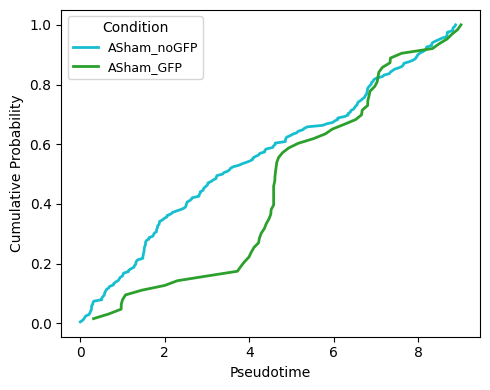

In [3]:


# Assuming `df` is your dataframe with a "Sample" and "Pseudotime" column
plt.figure(figsize=(5, 4))

# Loop through each sample and plot with specified styles
for sample, color, linestyle, linewidth in zip(
    ["ASham_noGFP", "ASham_GFP"], 
    ["#17becf", "#2ca02c"],  # Colors for ASham_noGFP and ASham_GFP
    ["-", "-"],  # Line styles: dashed for ASham_noGFP and solid for ASham_GFP
    [2, 2]  # Line widths for both
):
    # Create ECDF for each sample and plot
    ecdf = ECDF(df[df["Sample"] == sample]["Pseudotime"].dropna())
    plt.plot(ecdf.x, ecdf.y, label=sample, color=color, linestyle=linestyle, linewidth=linewidth)

# Adding titles and labels for publication standard
#plt.title("Empirical Cumulative Distribution Function (ECDF) of Pseudotime", fontsize=12, fontweight='bold')
plt.xlabel("Pseudotime", fontsize=10)
plt.ylabel("Cumulative Probability", fontsize=10)

# Customize legend and axes for better clarity
plt.legend(title="Condition", title_fontsize=10, fontsize=9, loc="best")
plt.tight_layout()

# Save the plot with high DPI for publication
plt.savefig("ECDF_PseudotimeRAPC1.png", dpi=300)

# Show the plot (optional)
plt.show()


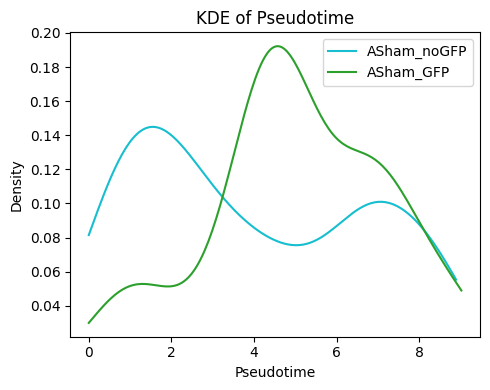

In [6]:
# --- KDE Plot ---
plt.figure(figsize=(5, 4))
for sample, color in zip(["ASham_noGFP", "ASham_GFP"], ["#17becf", "#2ca02c"]):
    data = df[df["Sample"] == sample]["Pseudotime"].dropna()
    kde = gaussian_kde(data)
    x_grid = np.linspace(0, data.max(), 200)
    plt.plot(x_grid, kde(x_grid), label=sample, color=color)
plt.title("KDE of Pseudotime")
plt.xlabel("Pseudotime")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.savefig("KDE_PseudotimeRAPC.png", dpi=300)



In [14]:
# --- Difference and % Shift ---
noGFP = df[df["Sample"] == "ASham_noGFP"]["Pseudotime"].dropna()
GFP = df[df["Sample"] == "ASham_GFP"]["Pseudotime"].dropna()

mean_noGFP = noGFP.mean()
mean_GFP = GFP.mean()
diff = mean_GFP - mean_noGFP
percent_shift = (diff / mean_noGFP) * 100

print(f"Mean ASham_noGFP Pseudotime: {mean_noGFP:.2f}")
print(f"Mean ASham_GFP Pseudotime: {mean_GFP:.2f}")
print(f"Difference: {diff:.2f}")
print(f"Percent Shift: {percent_shift:.2f}%")


Mean ASham_noGFP Pseudotime: 3.14
Mean ASham_GFP Pseudotime: 4.82
Difference: 1.69
Percent Shift: 53.78%


In [17]:
import numpy as np
import pandas as pd
from scipy import stats

# --- Extract pseudotime data for each condition ---
noGFP = df[df["Sample"] == "ASham_noGFP"]["Pseudotime"].dropna()
GFP = df[df["Sample"] == "ASham_GFP"]["Pseudotime"].dropna()

# --- Median pseudotime values ---
median_noGFP = np.median(noGFP)
median_GFP = np.median(GFP)

# --- Difference and percent shift ---
delta_pseudotime = median_GFP - median_noGFP
percent_shift = (delta_pseudotime / median_noGFP) * 100

# --- Statistical test (non-parametric) ---
stat, p_value = stats.ranksums(GFP, noGFP)

# --- Output ---
print(f"Median ASham_noGFP Pseudotime: {median_noGFP:.2f}")
print(f"Median ASham_GFP Pseudotime: {median_GFP:.2f}")
print(f"Δ ASham_GFP = {percent_shift:.1f}% (Median Shift)")
print(f"Wilcoxon rank-sum test: statistic = {stat:.2f}, p = {p_value:.4e}")


Median ASham_noGFP Pseudotime: 2.51
Median ASham_GFP Pseudotime: 4.96
Δ ASham_GFP = 97.7% (Median Shift)
Wilcoxon rank-sum test: statistic = 6.26, p = 3.9704e-10


In [5]:
import numpy as np
import pandas as pd
from scipy import stats

# --- Extract pseudotime data for each condition ---
noGFP = df[df["Sample"] == "ASham_noGFP"]["Pseudotime"].dropna()
GFP = df[df["Sample"] == "ASham_GFP"]["Pseudotime"].dropna()

# --- Median pseudotime values ---
median_noGFP = np.median(noGFP)
median_GFP = np.median(GFP)

# --- Ratio of medians and percent shift ---
delta_ratio = median_GFP / median_noGFP
percent_shift = (delta_ratio - 1) * 100  # To get the percent increase/decrease

# --- Statistical test (non-parametric) ---
stat, p_value = stats.ranksums(GFP, noGFP)

# --- Output ---
print(f"Median ASham_noGFP Pseudotime: {median_noGFP:.2f}")
print(f"Median ASham_GFP Pseudotime: {median_GFP:.2f}")
print(f"Δ ASham_GFP / ASham_noGFP = {delta_ratio:.2f} (Ratio of Medians)")
print(f"Percent Shift = {percent_shift:.1f}%")
print(f"Wilcoxon rank-sum test: statistic = {stat:.2f}, p = {p_value:.4e}")


Median ASham_noGFP Pseudotime: 3.38
Median ASham_GFP Pseudotime: 4.62
Δ ASham_GFP / ASham_noGFP = 1.37 (Ratio of Medians)
Percent Shift = 36.6%
Wilcoxon rank-sum test: statistic = 2.86, p = 4.3001e-03


C:\Users\tpsa222\AppData\Local\Temp\ipykernel_6560\1477520935.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x="Sample", y="Pseudotime",
C:\Users\tpsa222\AppData\Local\Temp\ipykernel_6560\1477520935.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  box_top = plot_df.groupby("Sample")["Pseudotime"].max()


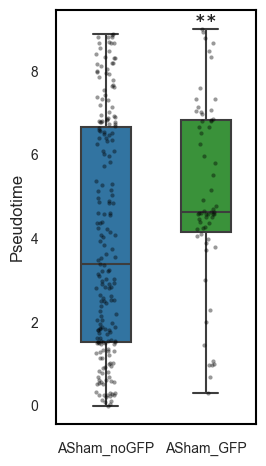

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import pandas as pd

# --- Prepare data ---
plot_df = df[df["Sample"].isin(["ASham_noGFP", "ASham_GFP"])].copy()
plot_df["Sample"] = pd.Categorical(plot_df["Sample"], categories=["ASham_noGFP", "ASham_GFP"], ordered=True)

# --- Statistical test ---
noGFP = plot_df[plot_df["Sample"] == "ASham_noGFP"]["Pseudotime"].dropna()
GFP = plot_df[plot_df["Sample"] == "ASham_GFP"]["Pseudotime"].dropna()
stat, p_value = ranksums(GFP, noGFP)

# --- Significance marker ---
if p_value < 0.001:
    significance = r'$\bf{***}$'
elif p_value < 0.01:
    significance = r'$\bf{**}$'
elif p_value < 0.05:
    significance = r'$\bf{*}$'
else:
    significance = "n.s."

# --- Plot ---
sns.set(style="white", context="talk")

# Reduce the figure size (half of current size)
fig, ax = plt.subplots(figsize=(3, 5))

# Boxplot
sns.boxplot(data=plot_df, x="Sample", y="Pseudotime",
            palette={"ASham_noGFP": "#1f77b4", "ASham_GFP": "#2ca02c"},
            order=["ASham_noGFP", "ASham_GFP"],
            linewidth=1.5, width=0.5, showcaps=True, showfliers=False, ax=ax)

# Jittered points
sns.stripplot(data=plot_df, x="Sample", y="Pseudotime",
              order=["ASham_noGFP", "ASham_GFP"],
              color="black", alpha=0.4, jitter=True, size=3, ax=ax)

# Calculate the y position for the stars above the box
box_top = plot_df.groupby("Sample")["Pseudotime"].max()
y_max_star = box_top.max() + 0.02  # Slightly above the max value

# Place significance above second box
ax.text(1, y_max_star, significance, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Axis styling
ax.set_xlabel("")
ax.set_ylabel("Pseudotime", fontsize=12)

# Black border around axis
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_color('black')

# Adjust label size to match
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.savefig("Pseudotime_Boxplot_SignificanceOnly_HalfSizeRAPC.png", dpi=300)
plt.show()


C:\Users\tpsa222\AppData\Local\Temp\ipykernel_21024\1738684744.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Condition")


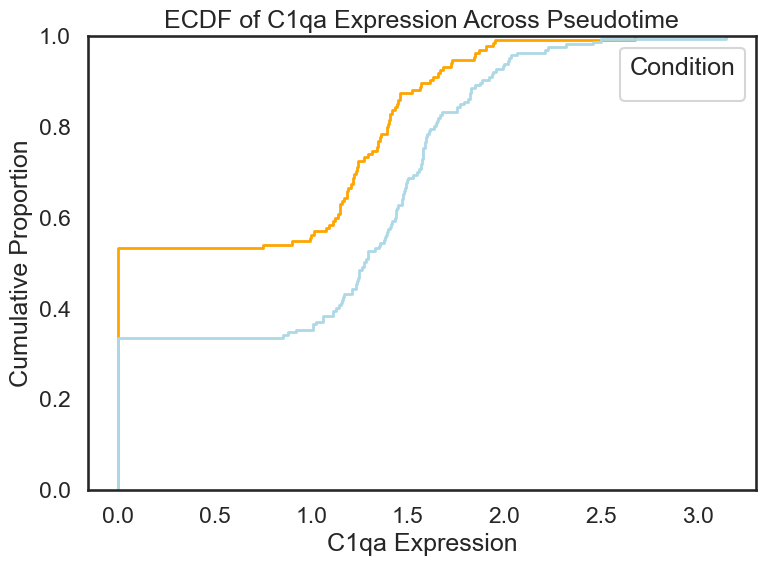

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
cluster_pseudotime_df = pd.read_csv("cluster_pseudotime_for_python.csv")
cell_metadata = pd.read_csv("cell_metadata_for_python.csv", index_col=0)

# Ensure all cell IDs are strings
expr_matrix.columns = expr_matrix.columns.astype(str)
cell_metadata.index = cell_metadata.index.astype(str)

# Step 1: Add correct cell IDs to cluster_pseudotime_df
cluster_pseudotime_df['cell'] = cell_metadata.index.to_list()

# Step 2: Transpose expression matrix (cells x genes)
expr_T = expr_matrix.T

# Step 3: Add C1qa expression
cluster_pseudotime_df['Cd163'] = expr_T.loc[cluster_pseudotime_df['cell'], 'Cd163'].values

# Step 4: Set up the plot
plt.figure(figsize=(8, 6))

# ECDF Plot for both conditions (ASham_GFP vs. ASham_noGFP)
sns.ecdfplot(
    data=cluster_pseudotime_df,
    x='Cd163',
    hue='Sample',
    palette={'ASham_GFP': 'lightblue', 'ASham_noGFP': 'orange'},
    stat='proportion', # To plot the cumulative distribution as proportion
    linewidth=2
)

# Add titles and labels
plt.title("ECDF of C1qa Expression Across Pseudotime")
plt.xlabel("C1qa Expression")
plt.ylabel("Cumulative Proportion")
plt.legend(title="Condition")

# Improve plot readability
plt.tight_layout()
plt.savefig("ECDF_C1qa_expression.png", dpi=300)
plt.show()


In [84]:
import pandas as pd

# Load the data
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)  # Expression data
cluster_pseudotime_df = pd.read_csv("cluster_pseudotime_for_python.csv")  # Pseudotime data
cell_metadata = pd.read_csv("cell_metadata_for_python.csv", index_col=0)  # Cell metadata

# Optional: If you have UMAP data and gene annotations, load them as well
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv")  # UMAP data for visualization
gene_annotation = pd.read_csv("gene_annotation_for_python.csv", index_col=0)  # Gene annotations


In [85]:
# Merge pseudotime data with cell metadata based on the cell identifiers
merged_df = pd.merge(cell_metadata, cluster_pseudotime_df, left_index=True, right_on="Sample")

# Match the expression matrix with cell metadata by sample names
expr_matrix = expr_matrix.T  # Transpose expression matrix so that each row corresponds to a cell
expr_matrix = expr_matrix.reset_index()  # Convert index to column for easy merging
merged_df = pd.merge(merged_df, expr_matrix, left_on="Sample", right_on="index")

# Optional: You may want to drop the index column after merging
merged_df = merged_df.drop(columns=["index"])


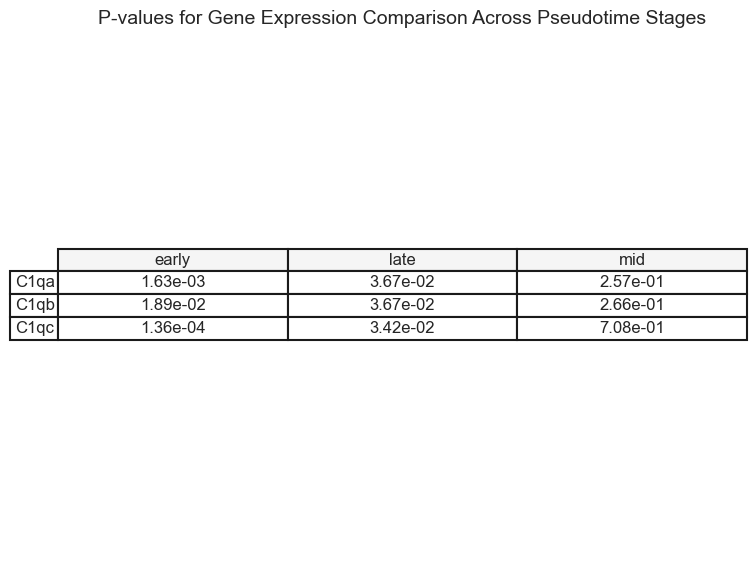

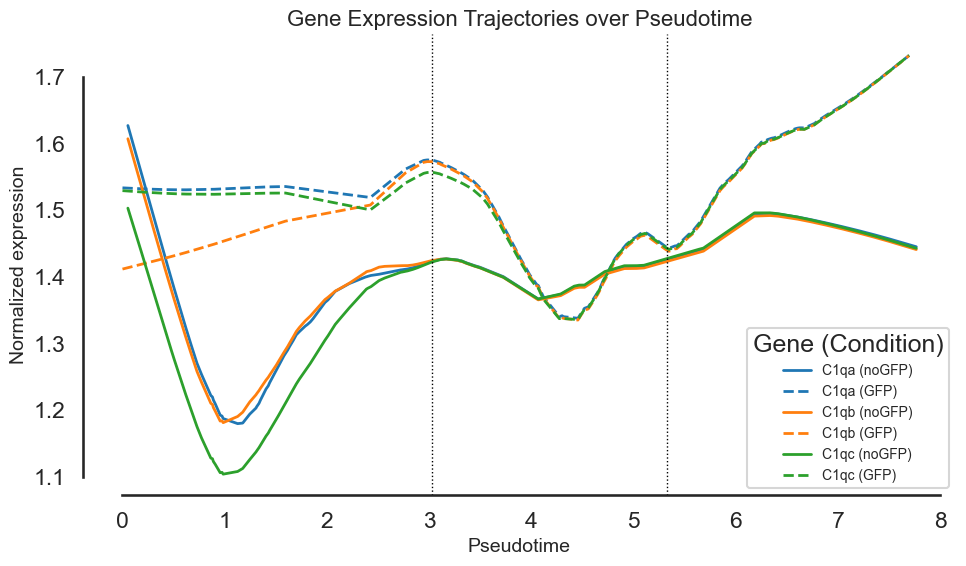

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import ttest_ind

# Load the R-exported data (replace with your actual file paths)
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
cell_metadata = pd.read_csv("cell_metadata_for_python.csv", index_col=0)

# Genes of interest
genes = ["C1qa", "C1qb", "C1qc"]

# Expression helper
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

# Pseudotime and bin edges
pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build DataFrame for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Create a DataFrame to store p-values for each gene at each pseudotime stage
p_values = []
for gene in genes:
    for stage, (low, high) in zip(['early', 'mid', 'late'], [(0, early_max), (early_max, mid_max), (mid_max, np.max(pseudotime))]):
        # Subset for each stage
        mask = (pseudotime >= low) & (pseudotime < high)
        expr_early = get_expr(gene)[mask & (umap_df["Sample"] == "ASham_noGFP")]
        expr_late = get_expr(gene)[mask & (umap_df["Sample"] == "ASham_GFP")]
        # Perform t-test for early vs. late stage comparison
        _, p_val = ttest_ind(expr_early, expr_late)
        # Store p-value in scientific notation with 2 decimal places
        p_values.append({
            "gene": gene,
            "stage": stage,
            "p-value": f"{p_val:.2e}"  # Scientific notation with 2 decimal places
        })

# Create a DataFrame for p-values
p_value_df = pd.DataFrame(p_values)

# Pivot the table to get genes as rows and stages as columns
p_value_pivot = p_value_df.pivot(index="gene", columns="stage", values="p-value")

# Display the p-values table (beautiful format)
plt.figure(figsize=(8, 6))
plt.axis('off')  # Hide the axes
table = plt.table(cellText=p_value_pivot.values,
                  colLabels=p_value_pivot.columns,
                  rowLabels=p_value_pivot.index,
                  cellLoc='center', loc='center', colColours=['#f5f5f5']*p_value_pivot.shape[1])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title("P-values for Gene Expression Comparison Across Pseudotime Stages", fontsize=14)
plt.tight_layout()
plt.show()

# Set up colors: one per gene
palette = sns.color_palette("tab10", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

# Plot all genes in one figure
plt.figure(figsize=(10,6))
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        ls = "-" if cond=="ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:,0], sm[:,1], color=color, linestyle=ls, linewidth=2, label=label)

# Add vertical lines for bin boundaries
ax.axvline(early_max, color="black", linestyle=":", linewidth=1)
ax.axvline(mid_max,   color="black", linestyle=":", linewidth=1)

# Final styling
ax.set_title("Gene Expression Trajectories over Pseudotime", fontsize=16)
ax.set_xlabel("Pseudotime", fontsize=14)
ax.set_ylabel("Normalized expression", fontsize=14)
# Avoid duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=10, title="Gene (Condition)")
sns.despine(trim=True)
plt.tight_layout()
plt.show()


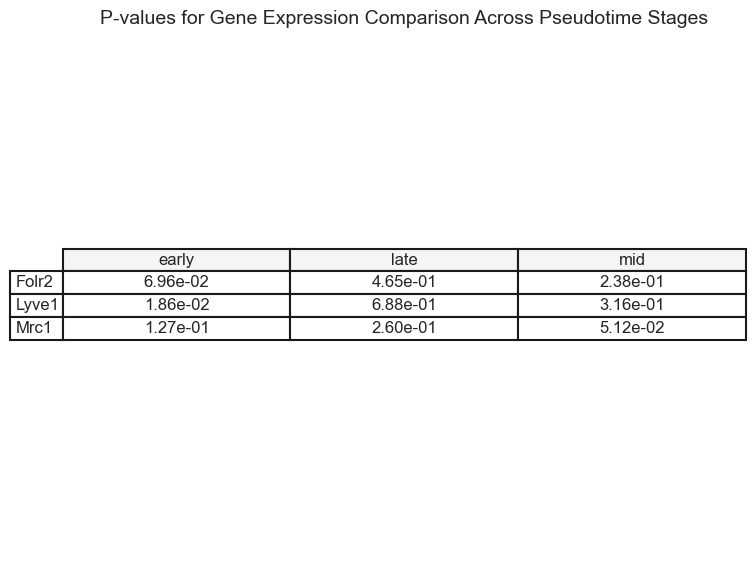

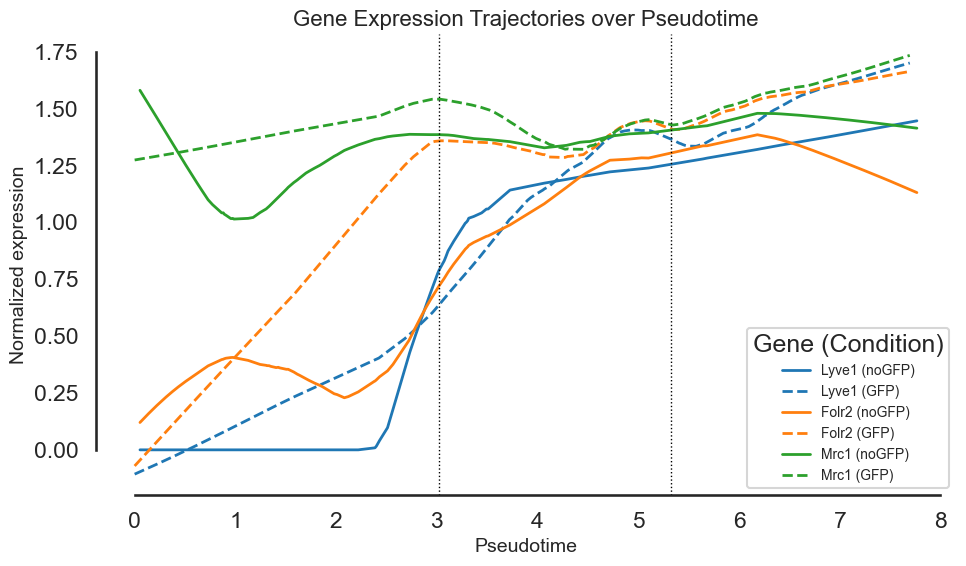

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import ttest_ind

# Load the R-exported data (replace with your actual file paths)
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
cell_metadata = pd.read_csv("cell_metadata_for_python.csv", index_col=0)

# Genes of interest
genes = ["Lyve1", "Folr2", "Mrc1", ]

# Expression helper
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

# Pseudotime and bin edges
pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build DataFrame for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Create a DataFrame to store p-values for each gene at each pseudotime stage
p_values = []
for gene in genes:
    for stage, (low, high) in zip(['early', 'mid', 'late'], [(0, early_max), (early_max, mid_max), (mid_max, np.max(pseudotime))]):
        # Subset for each stage
        mask = (pseudotime >= low) & (pseudotime < high)
        expr_early = get_expr(gene)[mask & (umap_df["Sample"] == "ASham_noGFP")]
        expr_late = get_expr(gene)[mask & (umap_df["Sample"] == "ASham_GFP")]
        # Perform t-test for early vs. late stage comparison
        _, p_val = ttest_ind(expr_early, expr_late)
        # Store p-value in scientific notation with 2 decimal places
        p_values.append({
            "gene": gene,
            "stage": stage,
            "p-value": f"{p_val:.2e}"  # Scientific notation with 2 decimal places
        })

# Create a DataFrame for p-values
p_value_df = pd.DataFrame(p_values)

# Pivot the table to get genes as rows and stages as columns
p_value_pivot = p_value_df.pivot(index="gene", columns="stage", values="p-value")

# Display the p-values table (beautiful format)
plt.figure(figsize=(8, 6))
plt.axis('off')  # Hide the axes
table = plt.table(cellText=p_value_pivot.values,
                  colLabels=p_value_pivot.columns,
                  rowLabels=p_value_pivot.index,
                  cellLoc='center', loc='center', colColours=['#f5f5f5']*p_value_pivot.shape[1])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title("P-values for Gene Expression Comparison Across Pseudotime Stages", fontsize=14)
plt.tight_layout()
plt.show()

# Set up colors: one per gene
palette = sns.color_palette("tab10", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

# Plot all genes in one figure
plt.figure(figsize=(10,6))
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        ls = "-" if cond=="ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:,0], sm[:,1], color=color, linestyle=ls, linewidth=2, label=label)

# Add vertical lines for bin boundaries
ax.axvline(early_max, color="black", linestyle=":", linewidth=1)
ax.axvline(mid_max,   color="black", linestyle=":", linewidth=1)

# Final styling
ax.set_title("Gene Expression Trajectories over Pseudotime", fontsize=16)
ax.set_xlabel("Pseudotime", fontsize=14)
ax.set_ylabel("Normalized expression", fontsize=14)
# Avoid duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=10, title="Gene (Condition)")
sns.despine(trim=True)
plt.tight_layout()
plt.show()


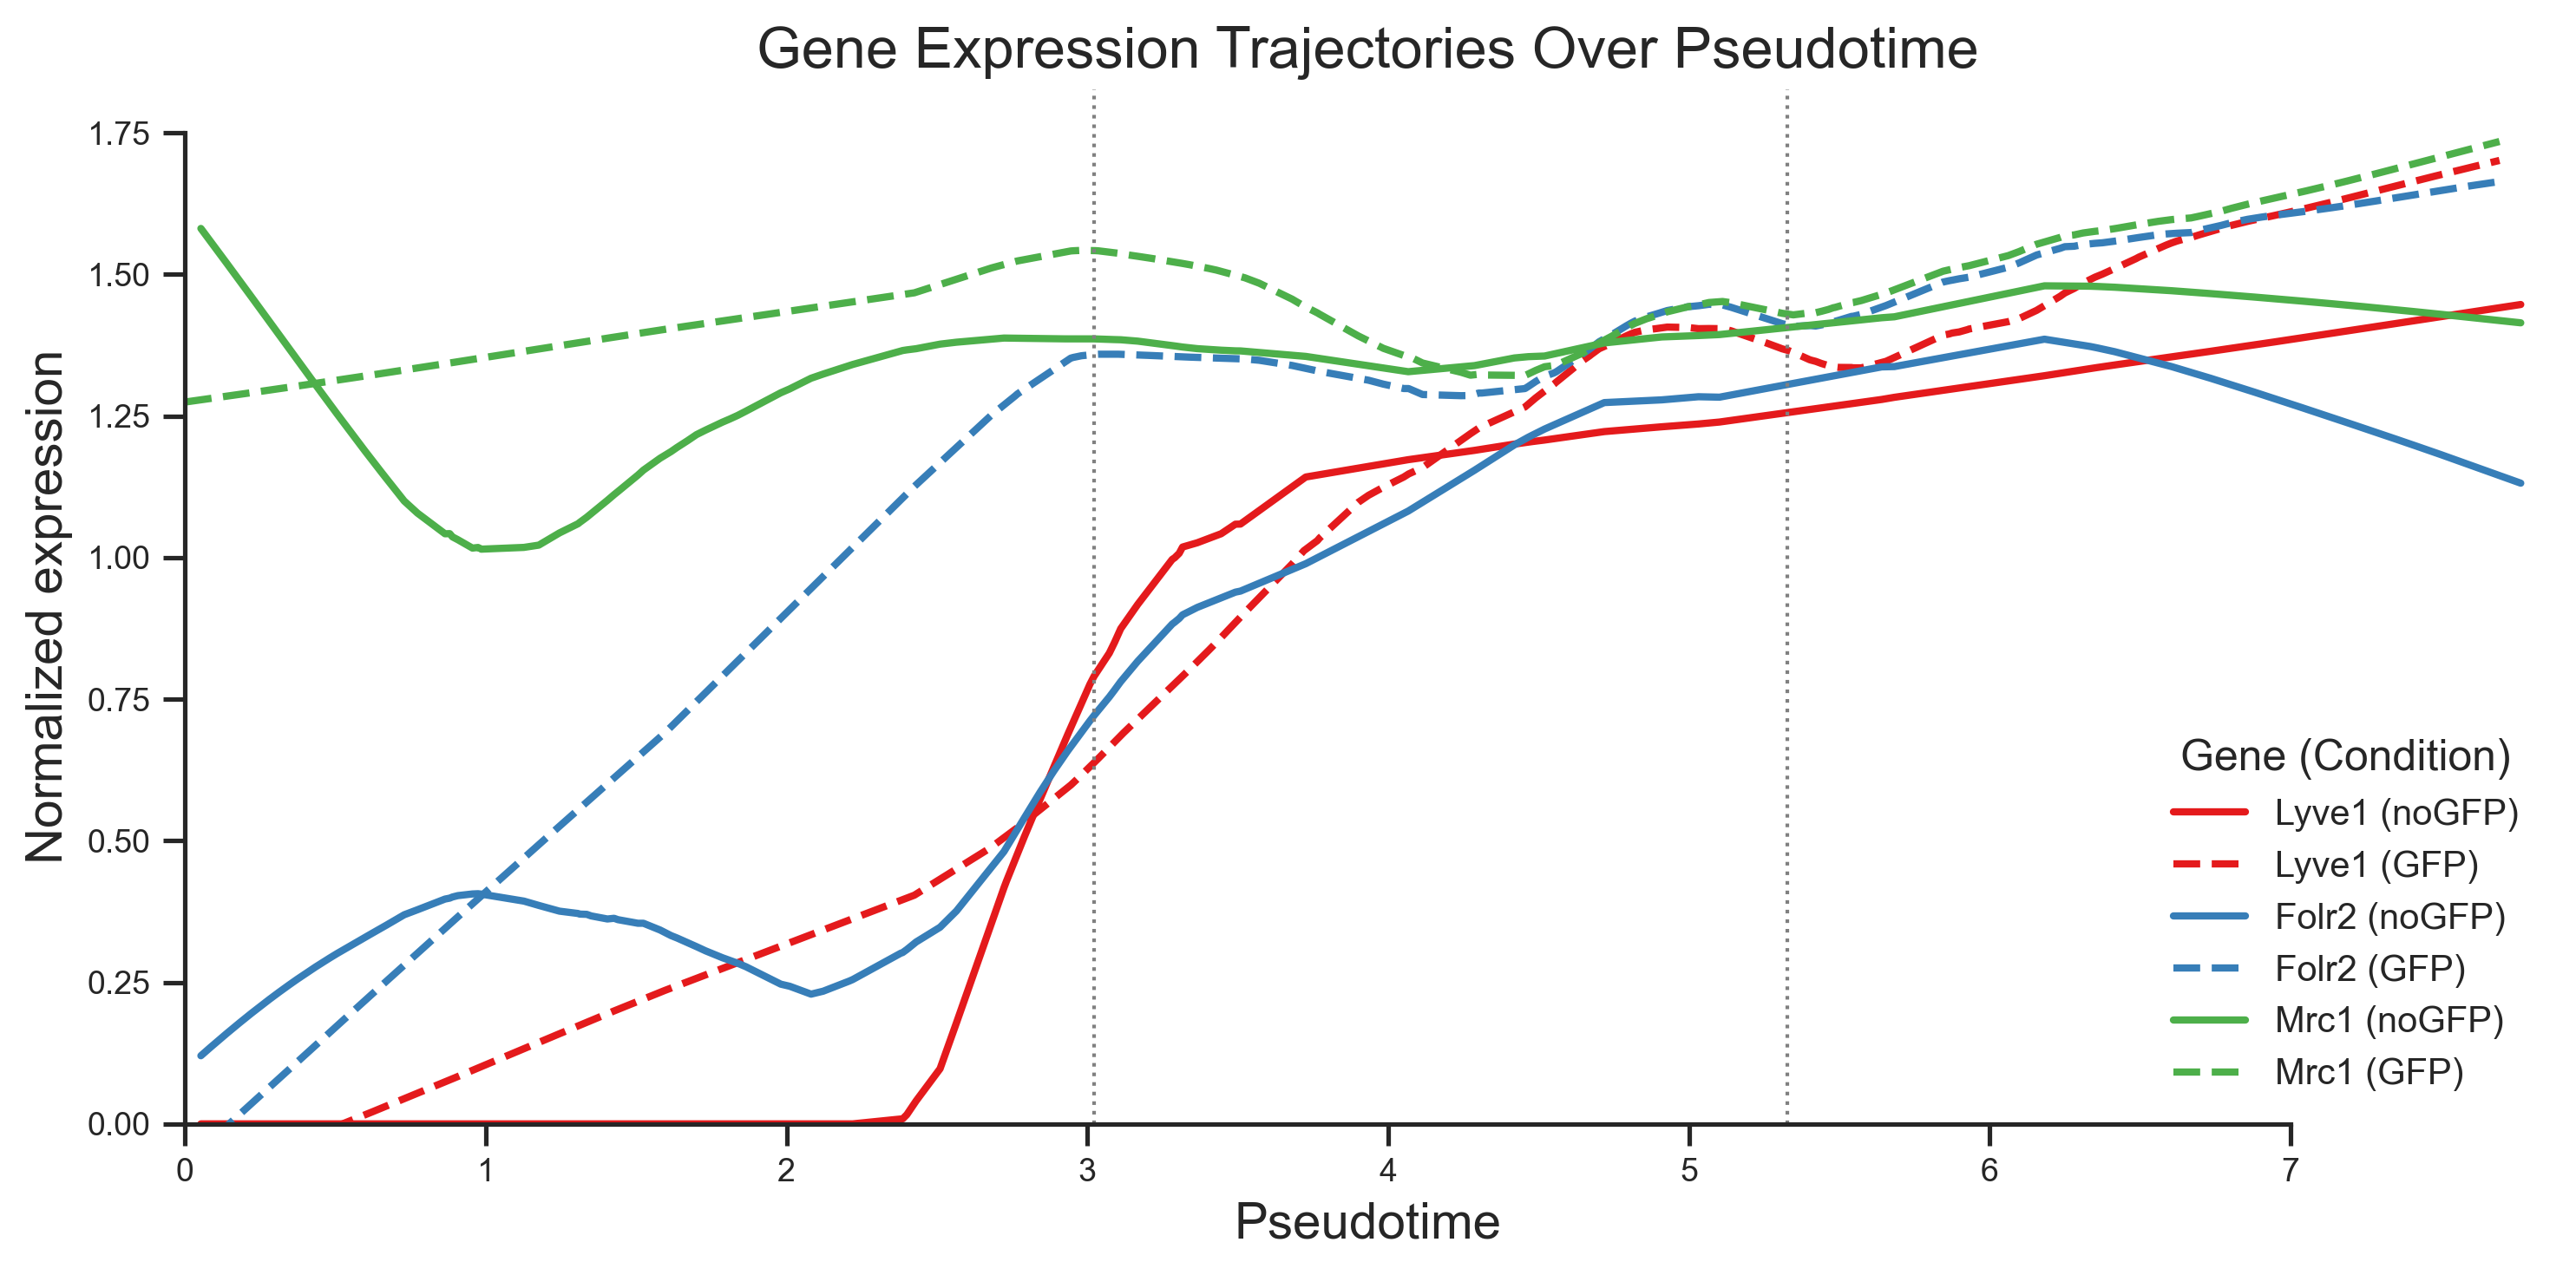

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
genes = ["Lyve1", "Folr2", "Mrc1"]

# Get expression values
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build dataframe for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Color settings
palette = sns.color_palette("Set1", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

# Plotting
plt.figure(figsize=(10, 5))
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        linestyle = "-" if cond == "ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:, 0], sm[:, 1], color=color, linestyle=linestyle, linewidth=2, label=label)

# Bin boundaries
ax.axvline(early_max, color="gray", linestyle=":", linewidth=1)
ax.axvline(mid_max, color="gray", linestyle=":", linewidth=1)

# Axis styling
ax.set_xlabel("Pseudotime", fontsize=14)
ax.set_ylabel("Normalized expression", fontsize=14)
ax.set_title("Gene Expression Trajectories Over Pseudotime", fontsize=16)

# Move spines to origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Adjust limits if needed to show axes properly
x_min, x_max = pseudotime.min(), pseudotime.max()
ax.set_xlim(left=max(0, x_min - 0.1), right=x_max + 0.1)
y_min = df["expression"].min()
ax.set_ylim(bottom=max(0, y_min - 0.1))

# Legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=10, title="Gene (Condition)")

sns.despine(trim=True)
plt.tight_layout()
plt.savefig("Pseudotime_gene_exp.png", dpi=300)
plt.show()


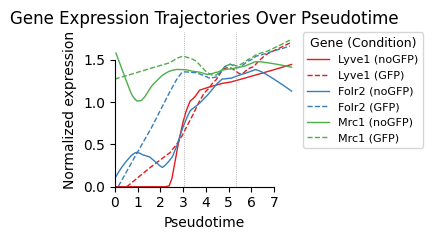

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
genes = ["Lyve1", "Folr2", "Mrc1"]

# Get expression values
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build dataframe for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Color settings
palette = sns.color_palette("Set1", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

# Plotting
plt.figure(figsize=(5, 2.5))  # Reduced figure size
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        linestyle = "-" if cond == "ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:, 0], sm[:, 1], color=color, linestyle=linestyle, linewidth=1, label=label)  # Thinner lines

# Bin boundaries
ax.axvline(early_max, color="gray", linestyle=":", linewidth=0.5)
ax.axvline(mid_max, color="gray", linestyle=":", linewidth=0.5)

# Axis styling
ax.set_xlabel("Pseudotime", fontsize=10)
ax.set_ylabel("Normalized expression", fontsize=10)
ax.set_title("Gene Expression Trajectories Over Pseudotime", fontsize=12)

# Move spines to origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Adjust limits
x_min, x_max = pseudotime.min(), pseudotime.max()
ax.set_xlim(left=max(0, x_min - 0.1), right=x_max + 0.1)
y_min = df["expression"].min()
ax.set_ylim(bottom=max(0, y_min - 0.1))

# Legend (moved to right outside plot)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(
    by_label.values(),
    by_label.keys(),
    fontsize=8,
    title="Gene (Condition)",
    title_fontsize=9,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

sns.despine(trim=True)
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for legend
plt.savefig("Pseudotime_gene_exp_small.png", dpi=300)
plt.show()


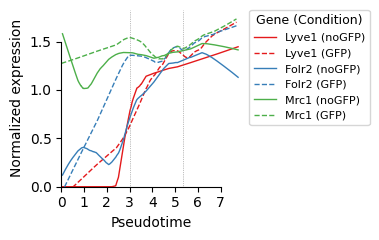

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
genes = ["Lyve1", "Folr2", "Mrc1"]

# Get expression values
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build dataframe for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Color settings
palette = sns.color_palette("Set1", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

# Plotting
plt.figure(figsize=(5, 2.5))  # Reduced figure size
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        linestyle = "-" if cond == "ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:, 0], sm[:, 1], color=color, linestyle=linestyle, linewidth=1, label=label)  # Thinner lines

# Bin boundaries
ax.axvline(early_max, color="gray", linestyle=":", linewidth=0.5)
ax.axvline(mid_max, color="gray", linestyle=":", linewidth=0.5)

# Axis styling
ax.set_xlabel("Pseudotime", fontsize=10)
ax.set_ylabel("Normalized expression", fontsize=10)
# Title removed here
# ax.set_title("Gene Expression Trajectories Over Pseudotime", fontsize=12)

# Move spines to origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Adjust limits
x_min, x_max = pseudotime.min(), pseudotime.max()
ax.set_xlim(left=max(0, x_min - 0.1), right=x_max + 0.1)
y_min = df["expression"].min()
ax.set_ylim(bottom=max(0, y_min - 0.1))

# Legend (moved to right outside plot)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(
    by_label.values(),
    by_label.keys(),
    fontsize=8,
    title="Gene (Condition)",
    title_fontsize=9,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

sns.despine(trim=True)
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for legend
plt.savefig("Pseudotime_gene_exp_small.png", dpi=300)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Define your gene list
genes = ["C1qa","C1qb","C1qc"]

# 2) Helper to extract expression
def get_expr(adata, gene):
    if "scvi_normalized" in adata.layers:
        mat = adata[:, gene].layers["scvi_normalized"]
    elif adata.raw is not None and gene in adata.raw.var_names:
        mat = adata.raw[:, gene].X
    else:
        mat = adata[:, gene].X
    return np.array(mat).flatten()

# 3) Build a long-form DataFrame
records = []
for gene in genes:
    expr = get_expr(adata, gene)
    for cond in ["ASham_noGFP","ASham_GFP"]:
        mask = adata.obs["Sample"] == cond
        df_tmp = pd.DataFrame({
            "gene": gene,
            "pseudotime": adata.obs.loc[mask, "pseudotime"],
            "expression": expr[mask.values],
            "condition": cond
        })
        # assign bins early/mid/late
        df_tmp["bin"] = pd.qcut(df_tmp["pseudotime"], 3, labels=["early","mid","late"])
        records.append(df_tmp)
df_long = pd.concat(records, ignore_index=True)

# 4) Compute mean expression per gene x condition x bin
df_mean = (
    df_long
    .groupby(["gene","condition","bin"])["expression"]
    .mean()
    .reset_index()
)

# 5) Pivot to wide format: rows=genes, cols=cond_bin
df_wide = df_mean.pivot(index="gene", columns=["condition","bin"], values="expression")

# Optionally z-score normalize each row (gene) across all six columns
df_norm = df_wide.sub(df_wide.mean(axis=1), axis=0).div(df_wide.std(axis=1), axis=0)

# 6) Plot heatmap
plt.figure(figsize=(4,4))
sns.heatmap(
    df_norm,
    cmap="vlag",
    center=0,
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Z-scored expression"},
    yticklabels=True
)
plt.title("Mean Expression of Genes by Pseudotime Bin and Condition", fontsize=14)
plt.xlabel("Condition / Pseudotime bin", fontsize=12)
plt.ylabel("Gene", fontsize=12)
plt.tight_layout()
plt.show()


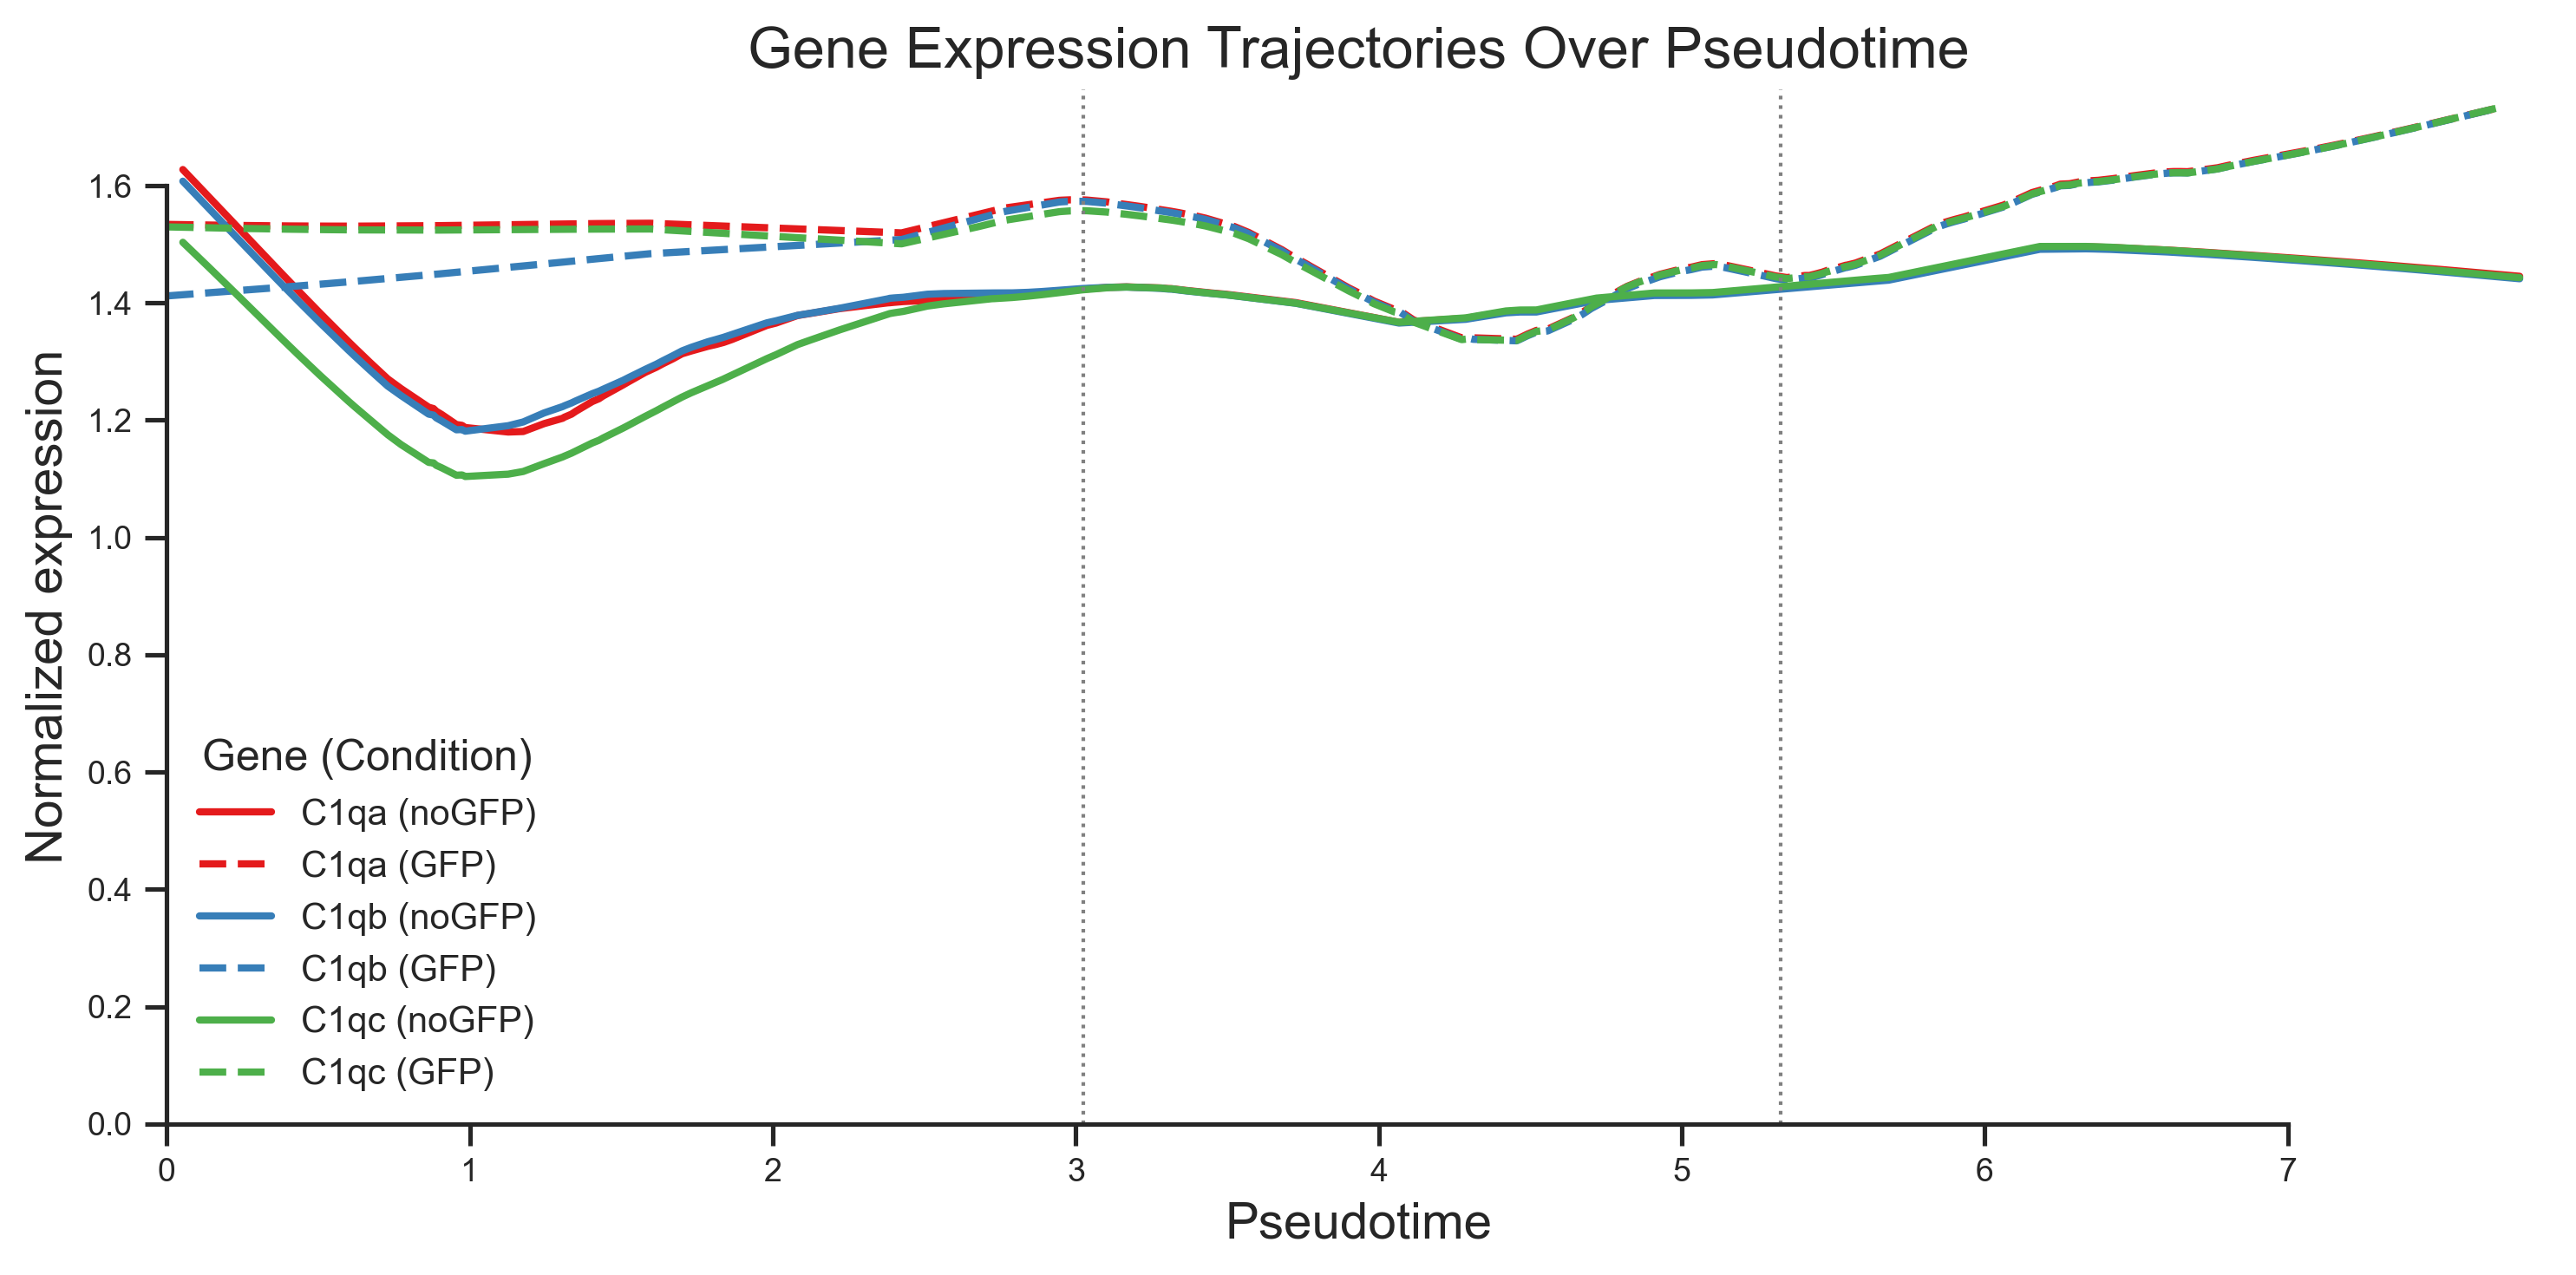

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
genes = ["C1qa", "C1qb", "C1qc"]

# Get expression values
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build dataframe for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Color settings
palette = sns.color_palette("Set1", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

# Plotting
plt.figure(figsize=(10, 5))
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        linestyle = "-" if cond == "ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:, 0], sm[:, 1], color=color, linestyle=linestyle, linewidth=2, label=label)

# Bin boundaries
ax.axvline(early_max, color="gray", linestyle=":", linewidth=1)
ax.axvline(mid_max, color="gray", linestyle=":", linewidth=1)

# Axis styling
ax.set_xlabel("Pseudotime", fontsize=14)
ax.set_ylabel("Normalized expression", fontsize=14)
ax.set_title("Gene Expression Trajectories Over Pseudotime", fontsize=16)

# Move spines to origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Adjust limits if needed to show axes properly
x_min, x_max = pseudotime.min(), pseudotime.max()
ax.set_xlim(left=max(0, x_min - 0.1), right=x_max + 0.1)
y_min = df["expression"].min()
ax.set_ylim(bottom=max(0, y_min - 0.1))

# Legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=10, title="Gene (Condition)")

sns.despine(trim=True)
plt.tight_layout()
plt.savefig("Pseudotime_gene_exp.png", dpi=300)
plt.show()


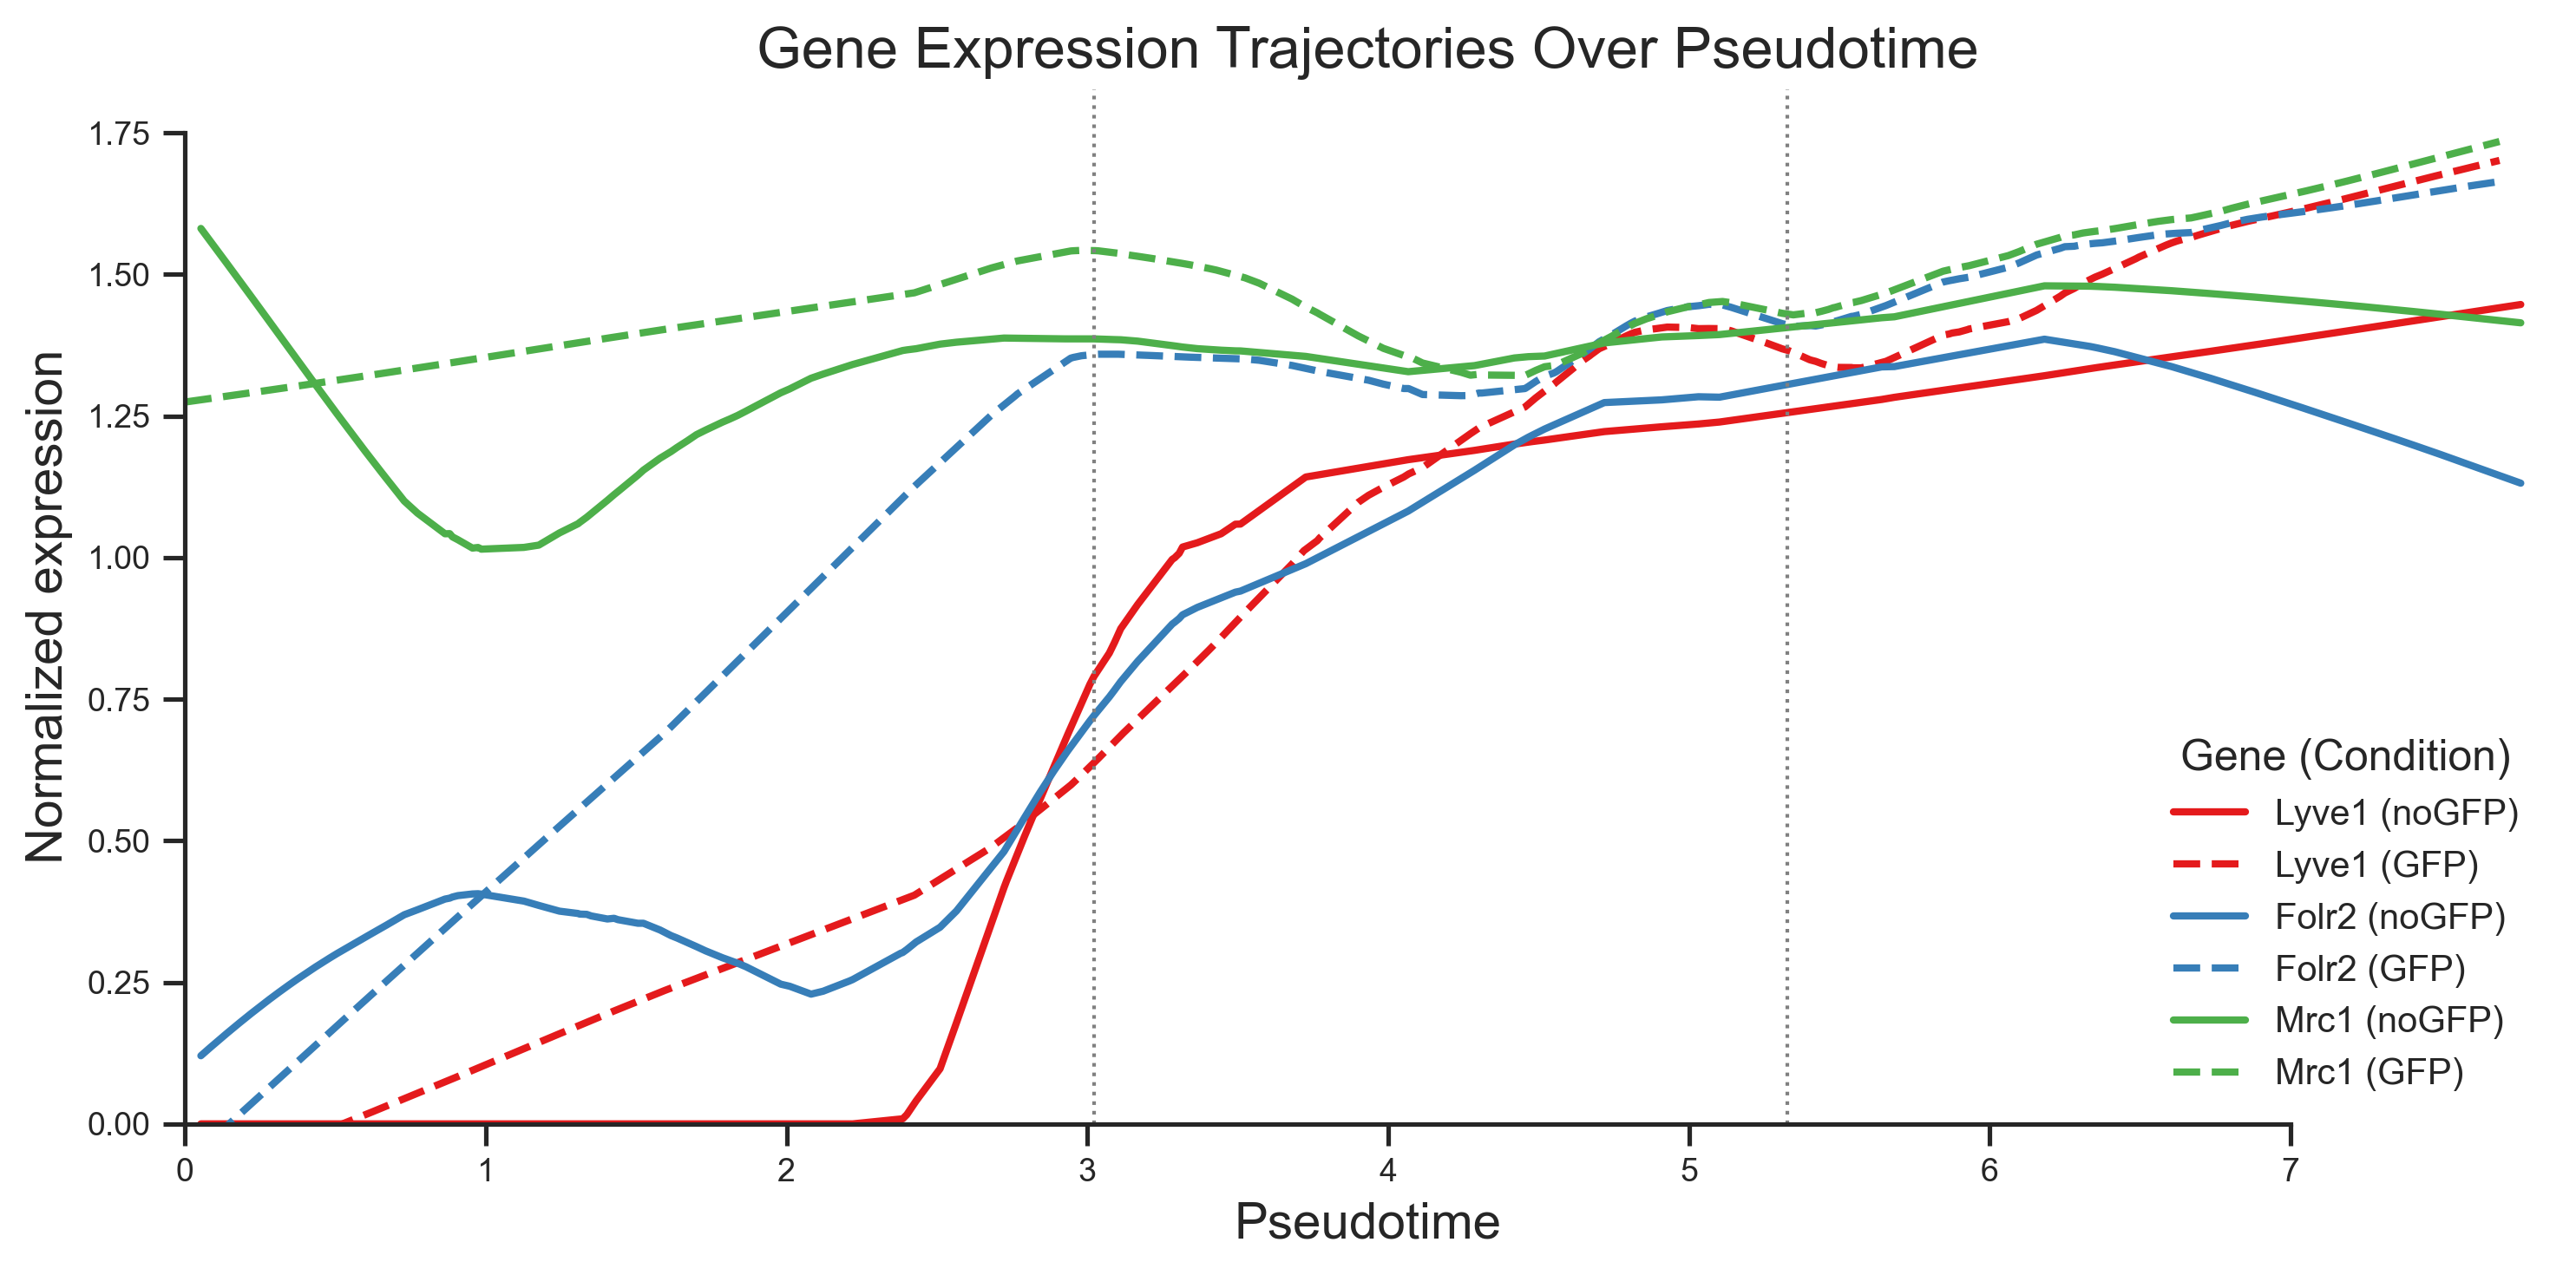

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import ttest_ind
from matplotlib.backends.backend_pdf import PdfPages

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
genes = ["Lyve1", "Folr2", "Mrc1"]

# Get expression values
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build dataframe for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Color settings
palette = sns.color_palette("Set1", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

# Perform statistical analysis (t-test for early vs late pseudotime)
p_values = []
for gene in genes:
    for stage, (low, high) in zip(['early', 'mid', 'late'], [(0, early_max), (early_max, mid_max), (mid_max, np.max(pseudotime))]):
        # Subset for each stage
        mask = (pseudotime >= low) & (pseudotime < high)
        expr_early = get_expr(gene)[mask & (umap_df["Sample"] == "ASham_noGFP")]
        expr_late = get_expr(gene)[mask & (umap_df["Sample"] == "ASham_GFP")]
        # Perform t-test for early vs. late stage comparison
        _, p_val = ttest_ind(expr_early, expr_late)
        # Store p-value in scientific notation with 2 decimal places
        p_values.append({
            "gene": gene,
            "stage": stage,
            "p-value": f"{p_val:.2e}"  # Scientific notation with 2 decimal places
        })

# Create a DataFrame for p-values
p_value_df = pd.DataFrame(p_values)

# Pivot the table to get genes as rows and stages as columns
p_value_pivot = p_value_df.pivot(index="gene", columns="stage", values="p-value")

# Save the p-value table to a CSV file
p_value_pivot.to_csv("gene_p_values_across_pseudotime_stages.csv")

# Optional: Save a flattened version of the table
p_value_pivot.reset_index().to_csv("gene_p_values_across_pseudotime_stages_flat.csv", index=False)

# Plotting
plt.figure(figsize=(10, 5))
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        linestyle = "-" if cond == "ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:, 0], sm[:, 1], color=color, linestyle=linestyle, linewidth=2, label=label)

# Bin boundaries
ax.axvline(early_max, color="gray", linestyle=":", linewidth=1)
ax.axvline(mid_max, color="gray", linestyle=":", linewidth=1)

# Axis styling
ax.set_xlabel("Pseudotime", fontsize=14)
ax.set_ylabel("Normalized expression", fontsize=14)
ax.set_title("Gene Expression Trajectories Over Pseudotime", fontsize=16)

# Move spines to origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Adjust limits
x_min, x_max = pseudotime.min(), pseudotime.max()
ax.set_xlim(left=max(0, x_min - 0.1), right=x_max + 0.1)
y_min = df["expression"].min()
ax.set_ylim(bottom=max(0, y_min - 0.1))

# Legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=10, title="Gene (Condition)")

sns.despine(trim=True)
plt.tight_layout()

# Save plot as PNG
plt.savefig("Pseudotime_gene_exp.png", dpi=300)

# Show the plot
plt.show()

# Now, save the statistical table (p-values) separately as a PDF
with PdfPages("gene_p_values_m2 mac.pdf") as pdf:
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a new figure for the table
    ax.axis('off')  # Hide axes for a clean table view
    
    # Adjust font size and table scaling
    table = ax.table(cellText=p_value_pivot.values,
                     colLabels=p_value_pivot.columns,
                     rowLabels=p_value_pivot.index,
                     cellLoc='center', loc='center', colColours=['#f5f5f5']*p_value_pivot.shape[1])

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Adjust font size for better readability
    table.scale(1.2, 1.2)  # Increase table size proportionally
    
    # Ensure the table fits within the page
    table.auto_set_column_width(col=list(range(len(p_value_pivot.columns))))  # Automatically adjust column width
    
    ax.set_title("P-values for Gene Expression Comparison Across Pseudotime Stages", fontsize=14)
    
    # Save the table figure to PDF
    pdf.savefig(fig)
    plt.close(fig)  # Close the table figure

# Show the plot
plt.show()


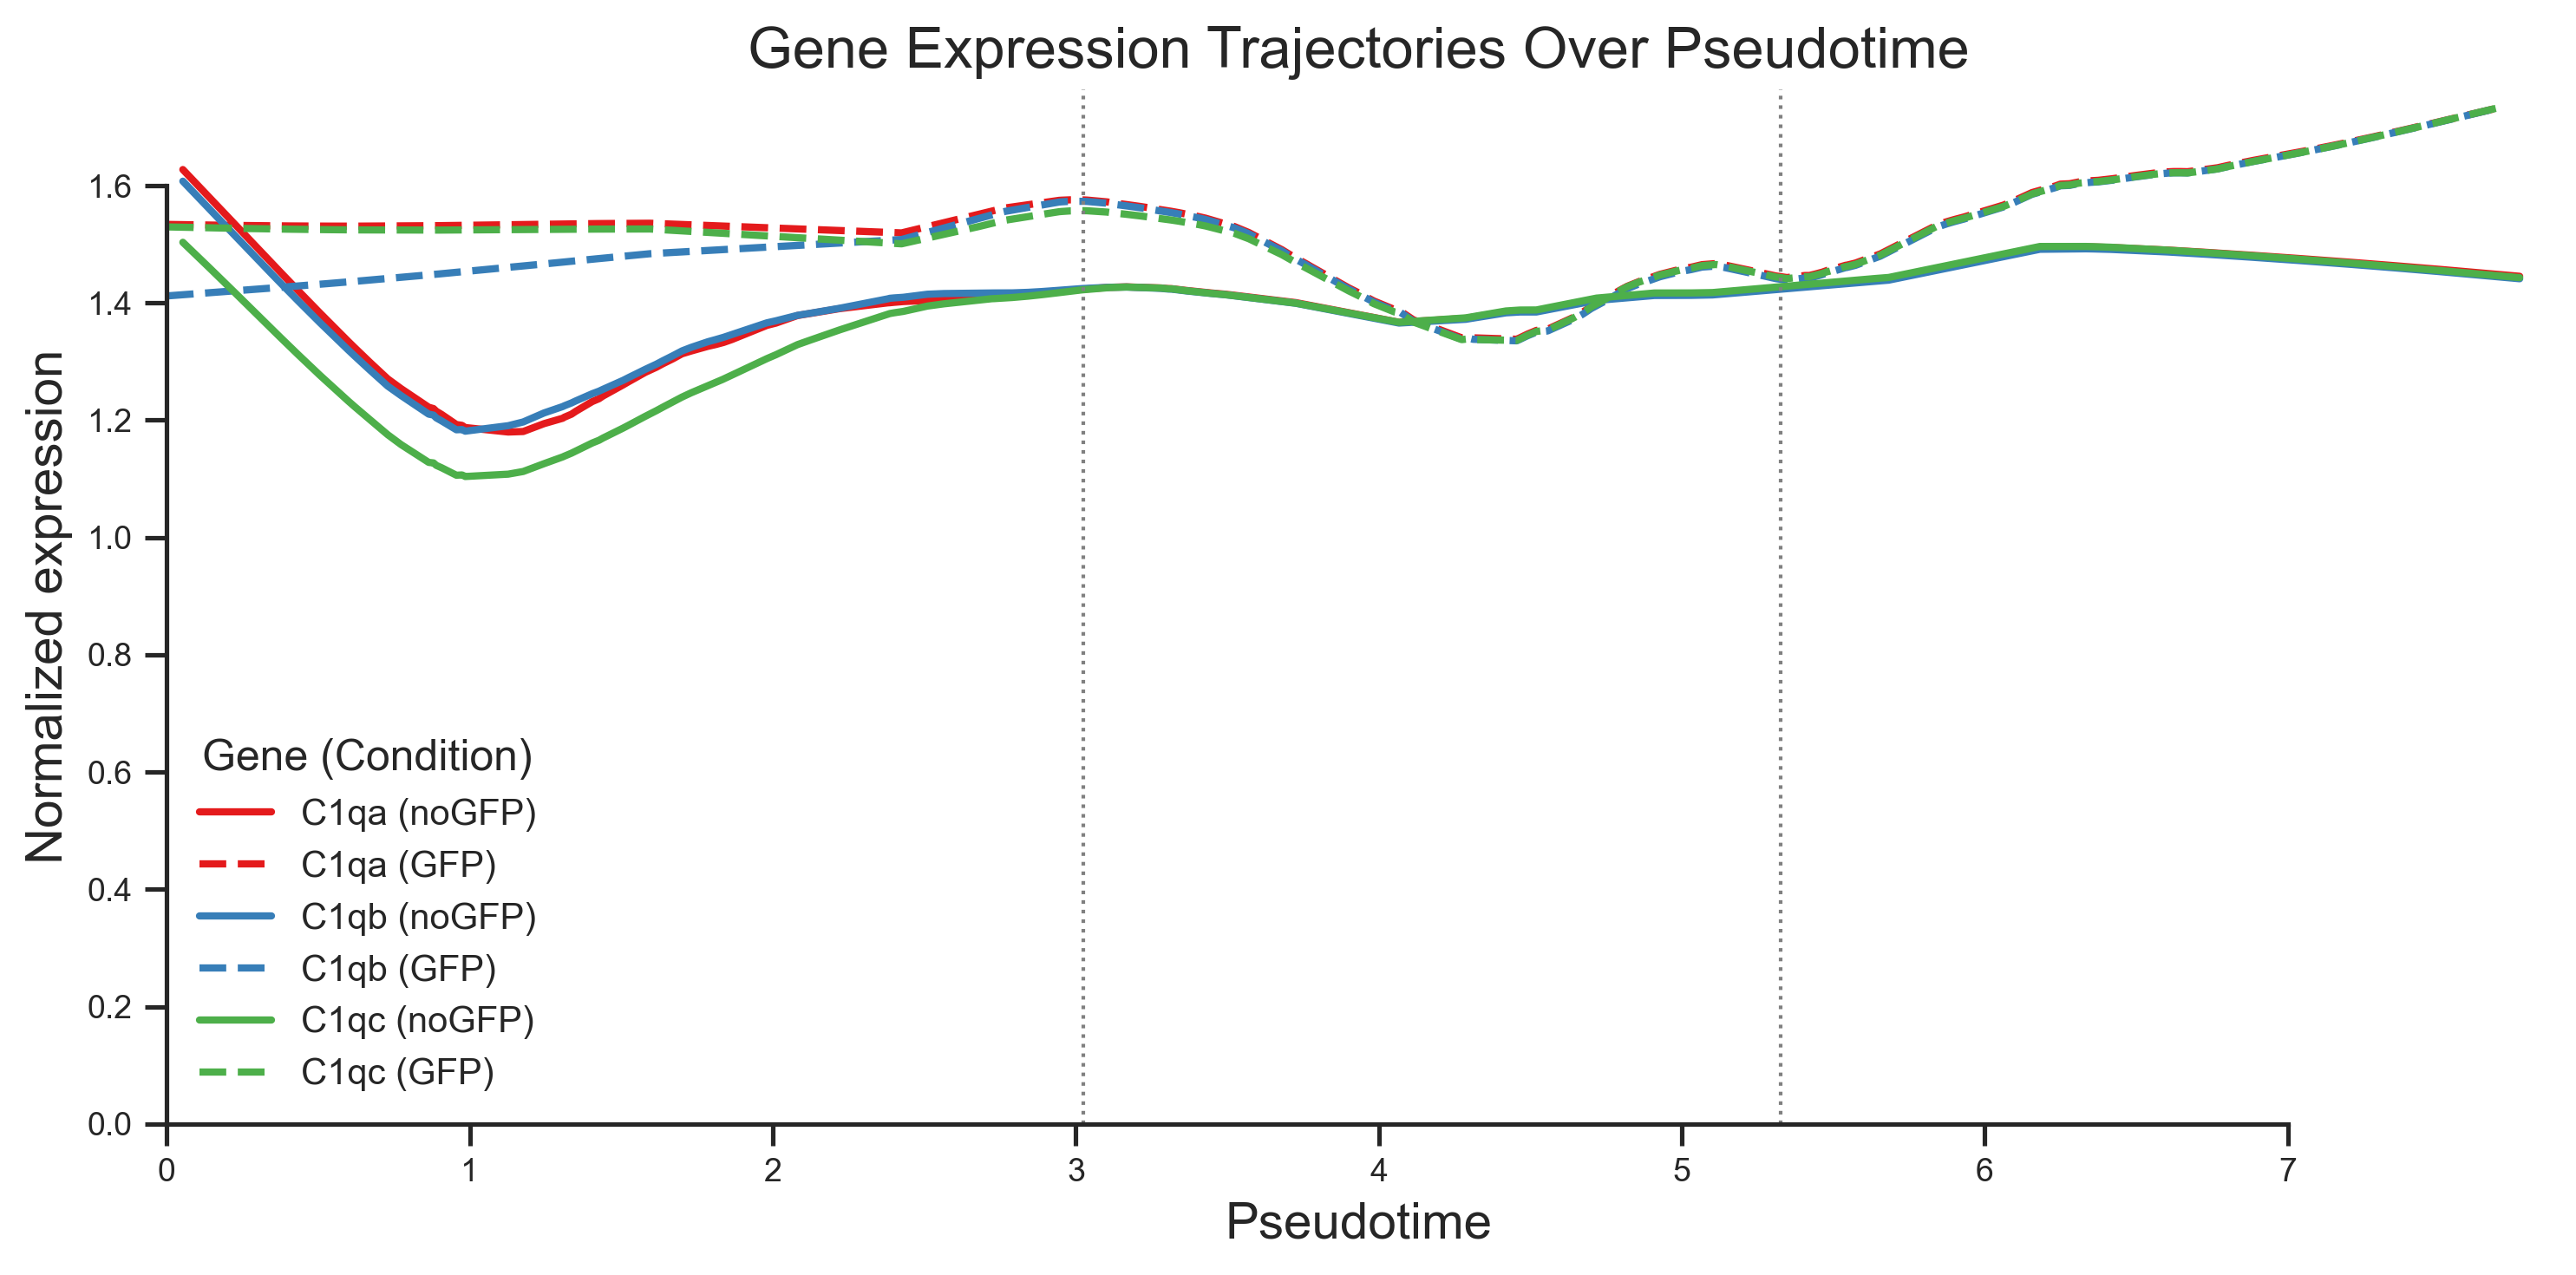

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import ttest_ind
from matplotlib.backends.backend_pdf import PdfPages

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
genes = ["C1qa", "C1qb", "C1qc"]

# Get expression values
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build dataframe for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Color settings
palette = sns.color_palette("Set1", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

# Perform statistical analysis (t-test for early vs late pseudotime)
p_values = []
for gene in genes:
    for stage, (low, high) in zip(['early', 'mid', 'late'], [(0, early_max), (early_max, mid_max), (mid_max, np.max(pseudotime))]):
        # Subset for each stage
        mask = (pseudotime >= low) & (pseudotime < high)
        expr_early = get_expr(gene)[mask & (umap_df["Sample"] == "ASham_noGFP")]
        expr_late = get_expr(gene)[mask & (umap_df["Sample"] == "ASham_GFP")]
        # Perform t-test for early vs. late stage comparison
        _, p_val = ttest_ind(expr_early, expr_late)
        # Store p-value in scientific notation with 2 decimal places
        p_values.append({
            "gene": gene,
            "stage": stage,
            "p-value": f"{p_val:.2e}"  # Scientific notation with 2 decimal places
        })

# Create a DataFrame for p-values
p_value_df = pd.DataFrame(p_values)

# Pivot the table to get genes as rows and stages as columns
p_value_pivot = p_value_df.pivot(index="gene", columns="stage", values="p-value")

# Save the p-value table to a CSV file
p_value_pivot.to_csv("gene_p_values_across_pseudotime_stages.csv")

# Optional: Save a flattened version of the table
p_value_pivot.reset_index().to_csv("gene_p_values_across_pseudotime_stages_flat.csv", index=False)

# Plotting
plt.figure(figsize=(10, 5))
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        linestyle = "-" if cond == "ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:, 0], sm[:, 1], color=color, linestyle=linestyle, linewidth=2, label=label)

# Bin boundaries
ax.axvline(early_max, color="gray", linestyle=":", linewidth=1)
ax.axvline(mid_max, color="gray", linestyle=":", linewidth=1)

# Axis styling
ax.set_xlabel("Pseudotime", fontsize=14)
ax.set_ylabel("Normalized expression", fontsize=14)
ax.set_title("Gene Expression Trajectories Over Pseudotime", fontsize=16)

# Move spines to origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Adjust limits
x_min, x_max = pseudotime.min(), pseudotime.max()
ax.set_xlim(left=max(0, x_min - 0.1), right=x_max + 0.1)
y_min = df["expression"].min()
ax.set_ylim(bottom=max(0, y_min - 0.1))

# Legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=10, title="Gene (Condition)")

sns.despine(trim=True)
plt.tight_layout()

# Save plot as PNG
plt.savefig("Pseudotime_gene_exp.png", dpi=300)

# Show the plot
plt.show()

# Now, save the statistical table (p-values) separately as a PDF
with PdfPages("gene_p_values_across_pseudotime_stages.pdf") as pdf:
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a new figure for the table
    ax.axis('off')  # Hide axes for a clean table view
    
    # Adjust font size and table scaling
    table = ax.table(cellText=p_value_pivot.values,
                     colLabels=p_value_pivot.columns,
                     rowLabels=p_value_pivot.index,
                     cellLoc='center', loc='center', colColours=['#f5f5f5']*p_value_pivot.shape[1])

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Adjust font size for better readability
    table.scale(1.2, 1.2)  # Increase table size proportionally
    
    # Ensure the table fits within the page
    table.auto_set_column_width(col=list(range(len(p_value_pivot.columns))))  # Automatically adjust column width
    
    ax.set_title("P-values for Gene Expression Comparison Across Pseudotime Stages", fontsize=14)
    
    # Save the table figure to PDF
    pdf.savefig(fig)
    plt.close(fig)  # Close the table figure

# Show the plot
plt.show()


C:\Users\tpsa222\AppData\Local\Temp\ipykernel_2696\1834111010.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_long


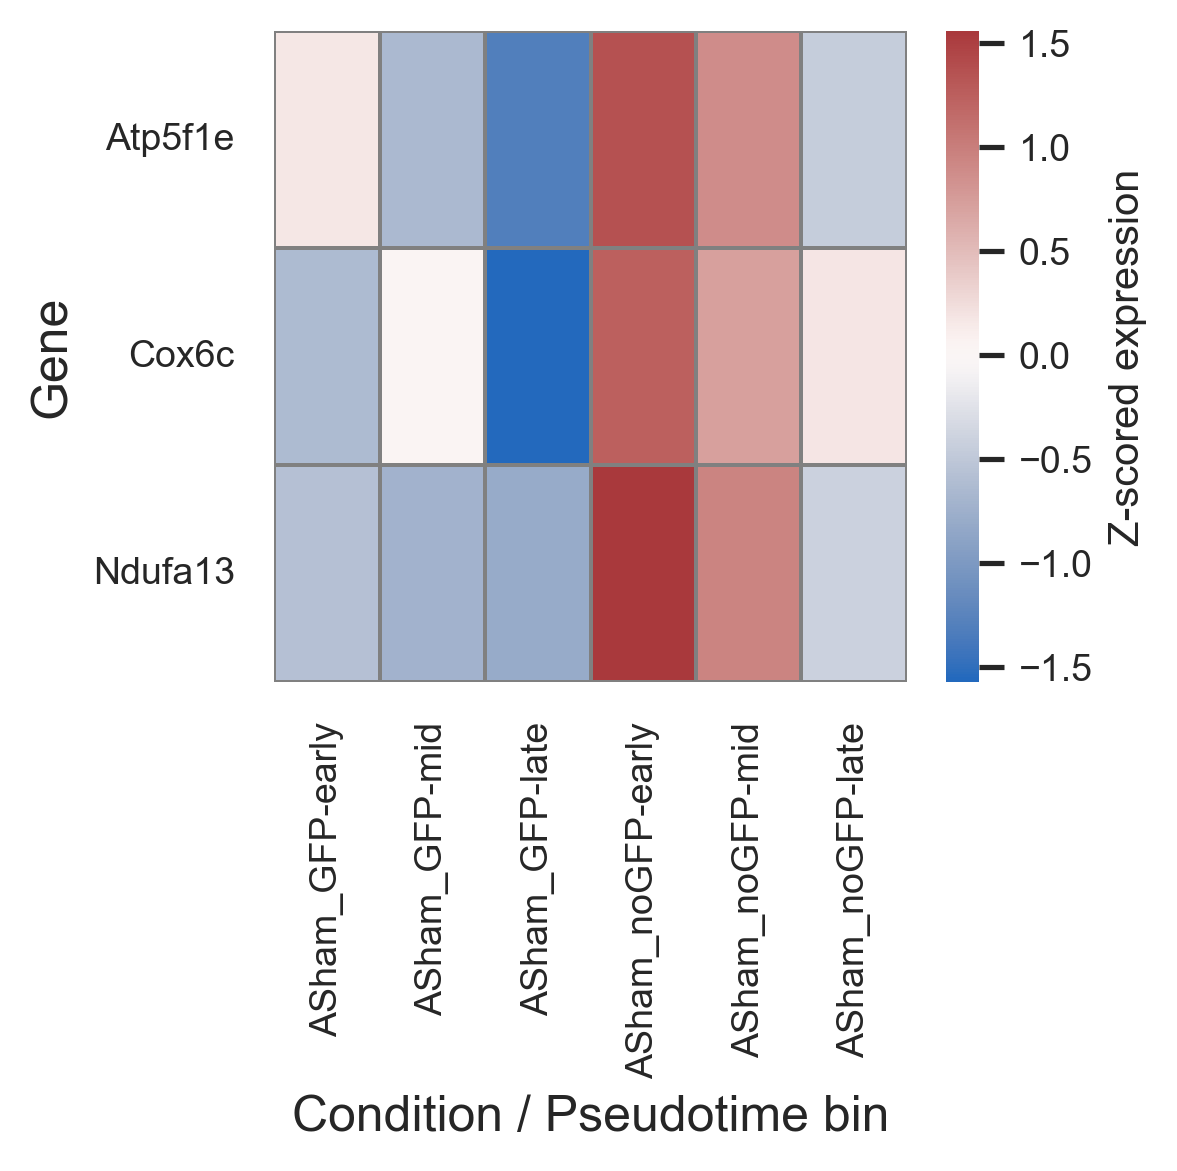

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import ttest_ind
from matplotlib.backends.backend_pdf import PdfPages

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
genes = ["Atp5f1e","Cox6c","Ndufa13"]

# Get expression values
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build dataframe for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Create long-form DataFrame for pseudotime binning
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        df_tmp = pd.DataFrame({
            "gene": gene,
            "pseudotime": umap_df.loc[mask, "Pseudotime"],
            "expression": expr[mask.values],
            "condition": cond
        })
        df_tmp["bin"] = pd.qcut(df_tmp["pseudotime"], 3, labels=["early", "mid", "late"])
        records.append(df_tmp)
df_long = pd.concat(records, ignore_index=True)

# Compute mean expression per gene × condition × bin
df_mean = (
    df_long
    .groupby(["gene", "condition", "bin"])["expression"]
    .mean()
    .reset_index()
)

# Pivot to wide format
df_wide = df_mean.pivot(index="gene", columns=["condition", "bin"], values="expression")

# Z-score normalize each row
df_norm = df_wide.sub(df_wide.mean(axis=1), axis=0).div(df_wide.std(axis=1), axis=0)

# 7) Plot heatmap with adjusted figure size
plt.figure(figsize=(4, 4))  # Wider and taller plot for better visualization
ax = sns.heatmap(
    df_norm,
    cmap="vlag",
    center=0,
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Z-scored expression"},
    yticklabels=True
)
# Rotate y-tick labels to horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')

#plt.title("Mean Expression of Genes by Pseudotime Bin and Condition", fontsize=12)
plt.xlabel("Condition / Pseudotime bin", fontsize=12)
plt.ylabel("Gene", fontsize=12)
plt.tight_layout()
plt.savefig("Pseudotime_gene_expheatmapoxi.png", dpi=300)
plt.show()


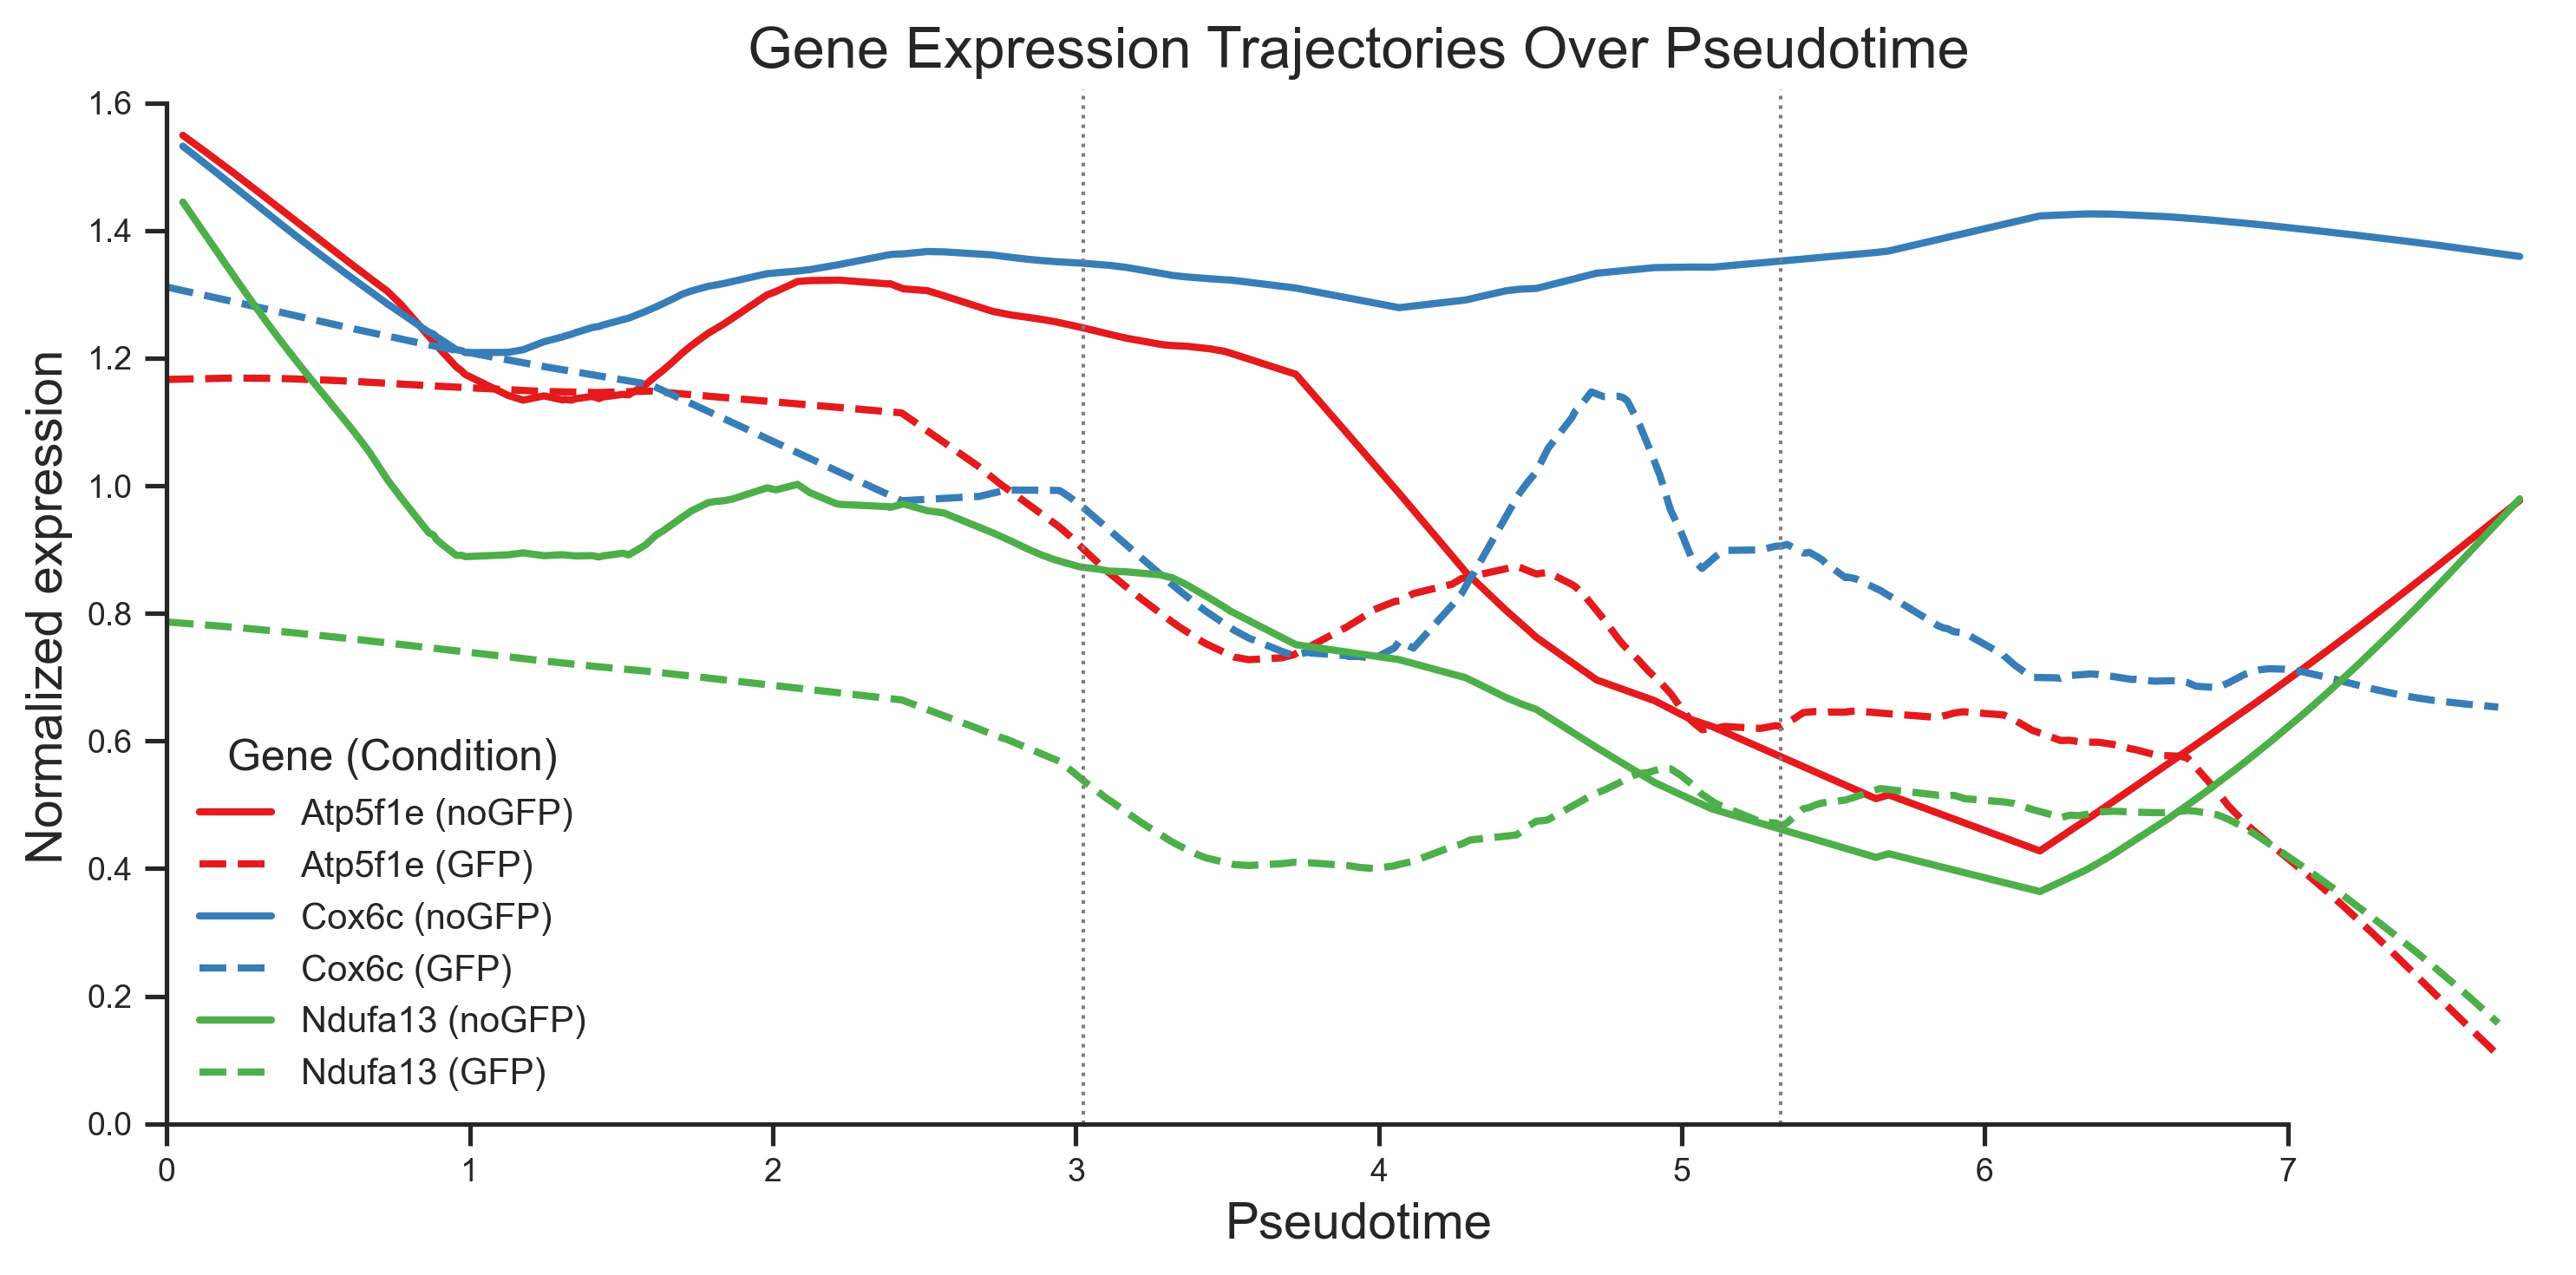

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import ttest_ind
from matplotlib.backends.backend_pdf import PdfPages

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
genes = ["Atp5f1e","Cox6c","Ndufa13"]

# Get expression values
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build dataframe for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Color settings
palette = sns.color_palette("Set1", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

# Perform statistical analysis (t-test for early vs late pseudotime)
p_values = []
for gene in genes:
    for stage, (low, high) in zip(['early', 'mid', 'late'], [(0, early_max), (early_max, mid_max), (mid_max, np.max(pseudotime))]):
        # Subset for each stage
        mask = (pseudotime >= low) & (pseudotime < high)
        expr_early = get_expr(gene)[mask & (umap_df["Sample"] == "ASham_noGFP")]
        expr_late = get_expr(gene)[mask & (umap_df["Sample"] == "ASham_GFP")]
        # Perform t-test for early vs. late stage comparison
        _, p_val = ttest_ind(expr_early, expr_late)
        # Store p-value in scientific notation with 2 decimal places
        p_values.append({
            "gene": gene,
            "stage": stage,
            "p-value": f"{p_val:.2e}"  # Scientific notation with 2 decimal places
        })

# Create a DataFrame for p-values
p_value_df = pd.DataFrame(p_values)

# Pivot the table to get genes as rows and stages as columns
p_value_pivot = p_value_df.pivot(index="gene", columns="stage", values="p-value")

# Save the p-value table to a CSV file
p_value_pivot.to_csv("gene_p_values_across_pseudotime_stages.csv")

# Optional: Save a flattened version of the table
p_value_pivot.reset_index().to_csv("gene_p_values_across_pseudotime_stages_flat.csv", index=False)

# Plotting
plt.figure(figsize=(10, 5))
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        linestyle = "-" if cond == "ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:, 0], sm[:, 1], color=color, linestyle=linestyle, linewidth=2, label=label)

# Bin boundaries
ax.axvline(early_max, color="gray", linestyle=":", linewidth=1)
ax.axvline(mid_max, color="gray", linestyle=":", linewidth=1)

# Axis styling
ax.set_xlabel("Pseudotime", fontsize=14)
ax.set_ylabel("Normalized expression", fontsize=14)
ax.set_title("Gene Expression Trajectories Over Pseudotime", fontsize=16)

# Move spines to origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Adjust limits if needed to show axes properly
x_min, x_max = pseudotime.min(), pseudotime.max()
ax.set_xlim(left=max(0, x_min - 0.1), right=x_max + 0.1)
y_min = df["expression"].min()
ax.set_ylim(bottom=max(0, y_min - 0.1))

# Legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=10, title="Gene (Condition)")

sns.despine(trim=True)
plt.tight_layout()
plt.savefig("Pseudotime_gene_exp.png", dpi=300)

# Now, save the statistical table (p-values) separately as a PDF
with PdfPages("gene_p_values_across_pseudotime_stages.pdf") as pdf:
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a new figure for the table
    ax.axis('off')  # Hide axes for a clean table view
    
    # Adjust font size and table scaling
    table = ax.table(cellText=p_value_pivot.values,
                     colLabels=p_value_pivot.columns,
                     rowLabels=p_value_pivot.index,
                     cellLoc='center', loc='center', colColours=['#f5f5f5']*p_value_pivot.shape[1])

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Adjust font size for better readability
    table.scale(1.2, 1.2)  # Increase table size proportionally
    
    # Ensure the table fits within the page
    table.auto_set_column_width(col=list(range(len(p_value_pivot.columns))))  # Automatically adjust column width
    
    ax.set_title("P-values for Gene Expression Comparison Across Pseudotime Stages", fontsize=14)
    pdf.savefig(fig)  # Save the table as a PDF
    plt.close(fig)  # Close the table figure

# Show the plot
plt.show()


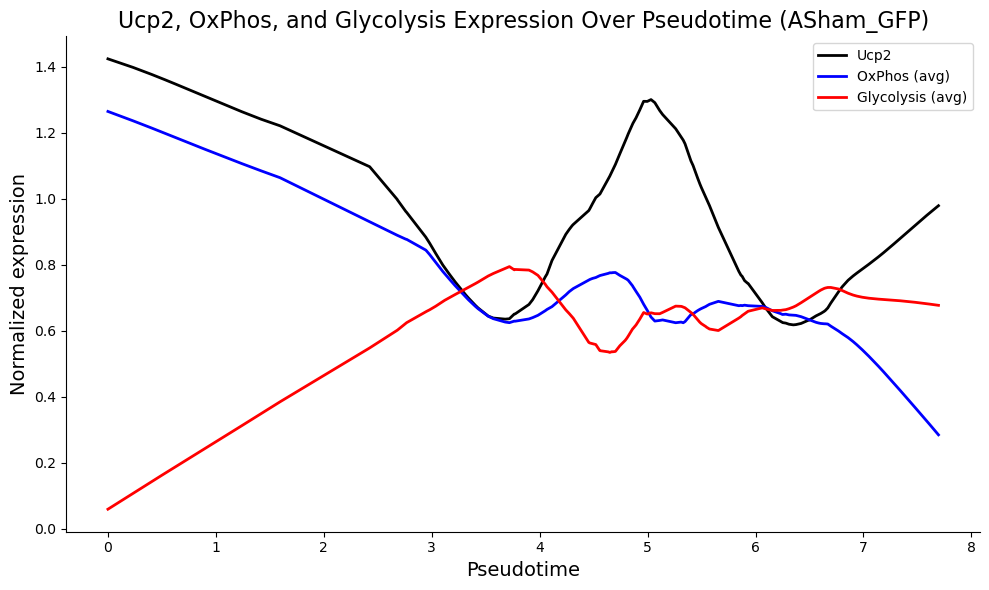

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns
import os

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")

# Load data
pseudotime_df = pd.read_csv("cluster_pseudotime_for_python.csv")  # no index_col
expression_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
cell_metadata = pd.read_csv("cell_metadata_for_python.csv", index_col=0)

# Step 1: Add cell barcodes to pseudotime_df
# Assuming no 'Cell' column in pseudotime_df, we assign based on order
pseudotime_df["Cell"] = cell_metadata.index[:len(pseudotime_df)]
pseudotime_df.set_index("Cell", inplace=True)

# Step 2: Merge pseudotime and metadata
df = pd.merge(pseudotime_df, cell_metadata, left_index=True, right_index=True)

# Rename 'Sample_x' and 'Sample_y' for clarity
df.rename(columns={'Sample_x': 'Sample_pseudotime', 'Sample_y': 'Sample_metadata'}, inplace=True)

# Debugging: Print columns and unique Sample values to verify
#print(df.columns)
#print(df["Sample_metadata"].unique())

# Step 3: Filter for specific condition (ASham_GFP)
condition = "ASham_GFP"

# Use 'Sample_metadata' for filtering
df_condition = df[df["Sample_metadata"] == condition]

# Step 4: Check if df_condition is valid
if df_condition.empty:
    print("No data found for the specified condition.")
else:
    # Filter expression matrix to match cell barcodes in df_condition
    expr_of_interest = expression_matrix.loc[:, df_condition.index]

    # Define genes
    oxphos_genes = ["Atp5f1e", "Atp5if1", "Cox6c", "Ndufa13"]
    glycolysis_genes = ["Hk2", "Pfkfb3"]
    target_gene = "Ucp2"
    all_genes_of_interest = oxphos_genes + glycolysis_genes + [target_gene]

    # Extract expression
    ucp2_expr = expr_of_interest.loc[target_gene]
    oxphos_expr = expr_of_interest.loc[oxphos_genes].mean(axis=0)
    glycolysis_expr = expr_of_interest.loc[glycolysis_genes].mean(axis=0)
    pseudotime = df_condition["Pseudotime"]

    # Plot
    plt.figure(figsize=(10, 6))
    colors = {"Ucp2": "black", "OxPhos": "blue", "Glycolysis": "red"}

    # LOWESS smoothing
    ucp2_smooth = lowess(ucp2_expr, pseudotime, frac=0.3)
    oxphos_smooth = lowess(oxphos_expr, pseudotime, frac=0.3)
    glyco_smooth = lowess(glycolysis_expr, pseudotime, frac=0.3)

    # Plot curves
    plt.plot(ucp2_smooth[:, 0], ucp2_smooth[:, 1], label="Ucp2", color=colors["Ucp2"], linewidth=2)
    plt.plot(oxphos_smooth[:, 0], oxphos_smooth[:, 1], label="OxPhos (avg)", color=colors["OxPhos"], linewidth=2)
    plt.plot(glyco_smooth[:, 0], glyco_smooth[:, 1], label="Glycolysis (avg)", color=colors["Glycolysis"], linewidth=2)

    # Format plot
    plt.xlabel("Pseudotime", fontsize=14)
    plt.ylabel("Normalized expression", fontsize=14)
    plt.title(f"Ucp2, OxPhos, and Glycolysis Expression Over Pseudotime ({condition})", fontsize=16)
    plt.legend()
    sns.despine()
    plt.tight_layout()
    # Save the plot as a PNG file
    plt.savefig("pseudotime_gene_expression_plot.png", dpi=300)
    plt.show()


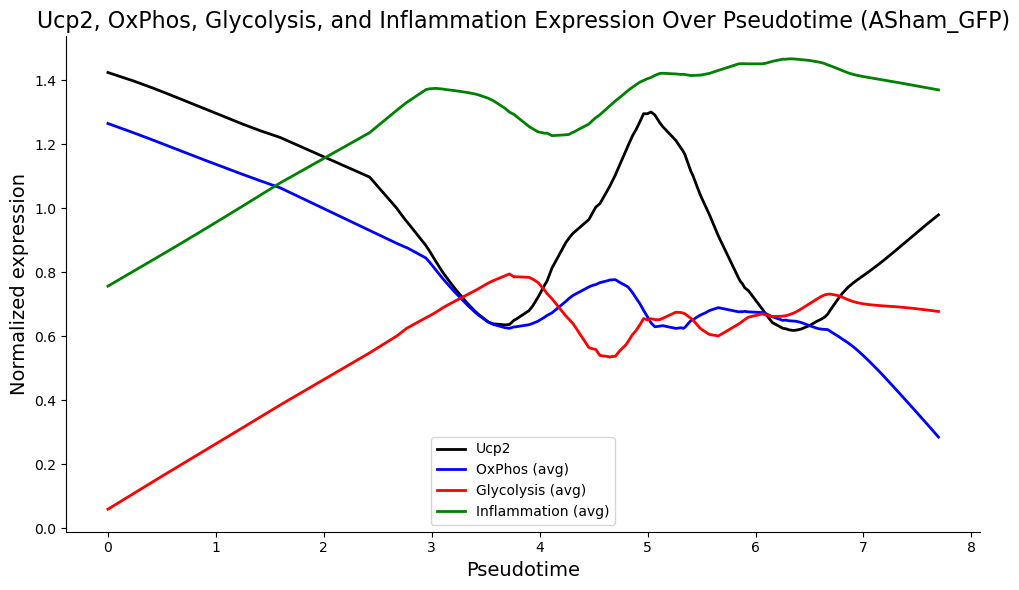

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns
import os

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")

# Load data
pseudotime_df = pd.read_csv("cluster_pseudotime_for_python.csv")  # no index_col
expression_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
cell_metadata = pd.read_csv("cell_metadata_for_python.csv", index_col=0)

# Step 1: Add cell barcodes to pseudotime_df
# Assuming no 'Cell' column in pseudotime_df, we assign based on order
pseudotime_df["Cell"] = cell_metadata.index[:len(pseudotime_df)]
pseudotime_df.set_index("Cell", inplace=True)

# Step 2: Merge pseudotime and metadata
df = pd.merge(pseudotime_df, cell_metadata, left_index=True, right_index=True)

# Rename 'Sample_x' and 'Sample_y' for clarity
df.rename(columns={'Sample_x': 'Sample_pseudotime', 'Sample_y': 'Sample_metadata'}, inplace=True)

# Step 3: Filter for specific condition (ASham_GFP)
condition = "ASham_GFP"

# Use 'Sample_metadata' for filtering
df_condition = df[df["Sample_metadata"] == condition]

# Step 4: Check if df_condition is valid
if df_condition.empty:
    print("No data found for the specified condition.")
else:
    # Filter expression matrix to match cell barcodes in df_condition
    expr_of_interest = expression_matrix.loc[:, df_condition.index]

    # Define genes
    oxphos_genes = ["Atp5f1e", "Atp5if1", "Cox6c", "Ndufa13"]
    glycolysis_genes = ["Hk2", "Pfkfb3"]
    target_gene = "Ucp2"
    inflammation_genes = ["Cxcl2", "Ccl2", "Ccl8", "Ccl7"]

    # Combine genes of interest
    all_genes_of_interest = oxphos_genes + glycolysis_genes + [target_gene] + inflammation_genes

    # Extract expression data for genes of interest
    ucp2_expr = expr_of_interest.loc[target_gene]
    oxphos_expr = expr_of_interest.loc[oxphos_genes].mean(axis=0)
    glycolysis_expr = expr_of_interest.loc[glycolysis_genes].mean(axis=0)
    inflammation_expr = expr_of_interest.loc[inflammation_genes].mean(axis=0)
    pseudotime = df_condition["Pseudotime"]

    # Plot
    plt.figure(figsize=(10, 6))
    colors = {
        "Ucp2": "black", 
        "OxPhos": "blue", 
        "Glycolysis": "red", 
        "Inflammation": "green"
    }

    # Apply LOWESS smoothing
    ucp2_smooth = lowess(ucp2_expr, pseudotime, frac=0.3)
    oxphos_smooth = lowess(oxphos_expr, pseudotime, frac=0.3)
    glyco_smooth = lowess(glycolysis_expr, pseudotime, frac=0.3)
    inflammation_smooth = lowess(inflammation_expr, pseudotime, frac=0.3)

    # Plot the smoothed expression data
    plt.plot(ucp2_smooth[:, 0], ucp2_smooth[:, 1], label="Ucp2", color=colors["Ucp2"], linewidth=2)
    plt.plot(oxphos_smooth[:, 0], oxphos_smooth[:, 1], label="OxPhos (avg)", color=colors["OxPhos"], linewidth=2)
    plt.plot(glyco_smooth[:, 0], glyco_smooth[:, 1], label="Glycolysis (avg)", color=colors["Glycolysis"], linewidth=2)
    plt.plot(inflammation_smooth[:, 0], inflammation_smooth[:, 1], label="Inflammation (avg)", color=colors["Inflammation"], linewidth=2)

    # Customize the plot
    plt.xlabel("Pseudotime", fontsize=14)
    plt.ylabel("Normalized expression", fontsize=14)
    plt.title(f"Ucp2, OxPhos, Glycolysis, and Inflammation Expression Over Pseudotime ({condition})", fontsize=16)
    plt.legend()
    sns.despine()
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig("pseudotime_gene_expression_with_inflammation_plot.png", dpi=300)

    # Show the plot
    plt.show()


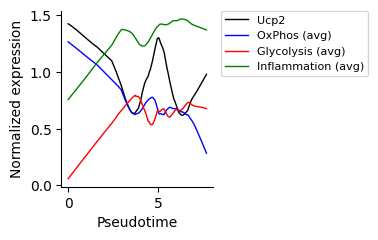

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns
import os

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")

# Load data
pseudotime_df = pd.read_csv("cluster_pseudotime_for_python.csv")
expression_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
cell_metadata = pd.read_csv("cell_metadata_for_python.csv", index_col=0)

# Step 1: Add cell barcodes to pseudotime_df
pseudotime_df["Cell"] = cell_metadata.index[:len(pseudotime_df)]
pseudotime_df.set_index("Cell", inplace=True)

# Step 2: Merge pseudotime and metadata
df = pd.merge(pseudotime_df, cell_metadata, left_index=True, right_index=True)
df.rename(columns={'Sample_x': 'Sample_pseudotime', 'Sample_y': 'Sample_metadata'}, inplace=True)

# Step 3: Filter for specific condition
condition = "ASham_GFP"
df_condition = df[df["Sample_metadata"] == condition]

if df_condition.empty:
    print("No data found for the specified condition.")
else:
    expr_of_interest = expression_matrix.loc[:, df_condition.index]

    oxphos_genes = ["Atp5f1e", "Atp5if1", "Cox6c", "Ndufa13"]
    glycolysis_genes = ["Hk2", "Pfkfb3"]
    target_gene = "Ucp2"
    inflammation_genes = ["Cxcl2", "Ccl2", "Ccl8", "Ccl7"]

    all_genes_of_interest = oxphos_genes + glycolysis_genes + [target_gene] + inflammation_genes

    ucp2_expr = expr_of_interest.loc[target_gene]
    oxphos_expr = expr_of_interest.loc[oxphos_genes].mean(axis=0)
    glycolysis_expr = expr_of_interest.loc[glycolysis_genes].mean(axis=0)
    inflammation_expr = expr_of_interest.loc[inflammation_genes].mean(axis=0)
    pseudotime = df_condition["Pseudotime"]

    # Plot
    plt.figure(figsize=(5, 2.5))  # Reduced size
    colors = {
        "Ucp2": "black", 
        "OxPhos": "blue", 
        "Glycolysis": "red", 
        "Inflammation": "green"
    }

    ucp2_smooth = lowess(ucp2_expr, pseudotime, frac=0.3)
    oxphos_smooth = lowess(oxphos_expr, pseudotime, frac=0.3)
    glyco_smooth = lowess(glycolysis_expr, pseudotime, frac=0.3)
    inflammation_smooth = lowess(inflammation_expr, pseudotime, frac=0.3)

    plt.plot(ucp2_smooth[:, 0], ucp2_smooth[:, 1], label="Ucp2", color=colors["Ucp2"], linewidth=1)
    plt.plot(oxphos_smooth[:, 0], oxphos_smooth[:, 1], label="OxPhos (avg)", color=colors["OxPhos"], linewidth=1)
    plt.plot(glyco_smooth[:, 0], glyco_smooth[:, 1], label="Glycolysis (avg)", color=colors["Glycolysis"], linewidth=1)
    plt.plot(inflammation_smooth[:, 0], inflammation_smooth[:, 1], label="Inflammation (avg)", color=colors["Inflammation"], linewidth=1)

    plt.xlabel("Pseudotime", fontsize=10)
    plt.ylabel("Normalized expression", fontsize=10)
    # Remove or reduce title
    # plt.title(f"Ucp2, OxPhos, Glycolysis, and Inflammation Expression Over Pseudotime ({condition})", fontsize=12)

    plt.legend(fontsize=8, title_fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    sns.despine()
    plt.tight_layout(rect=[0, 0, 0.8, 1])  # leave space for legend
    plt.savefig("pseudotime_gene_expression_with_inflammation_plot_small.png", dpi=300)
    plt.show()


Correlation results with Ucp2:
OxPhos: Spearman ρ = 0.09, p-value = 2.4e-01
Glycolysis: Spearman ρ = -0.09, p-value = 2.7e-01
Inflammation: Spearman ρ = -0.10, p-value = 1.9e-01


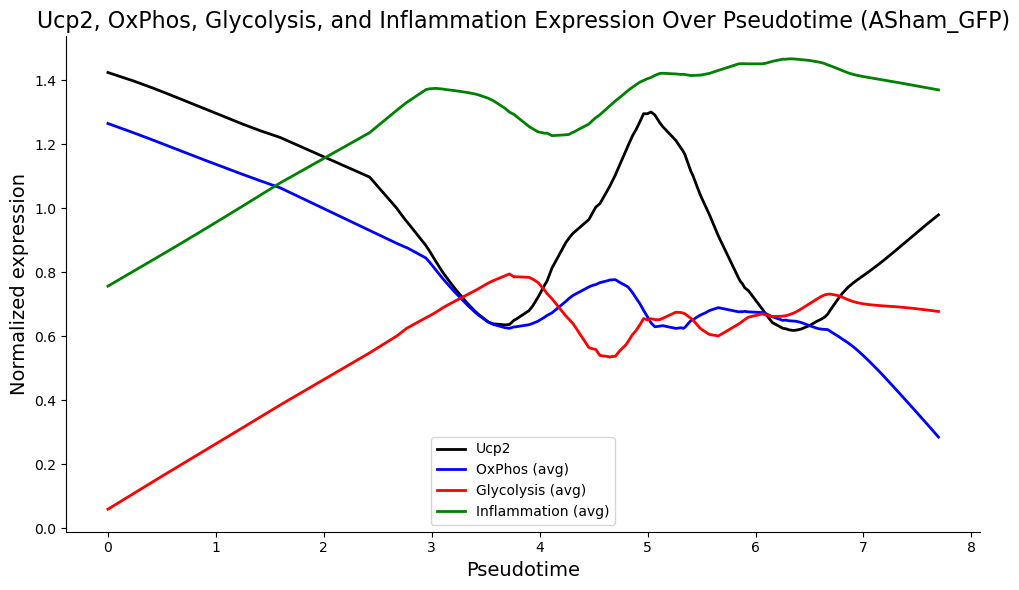

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns
import os
from scipy.stats import spearmanr

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")

# Load data
pseudotime_df = pd.read_csv("cluster_pseudotime_for_python.csv")  # no index_col
expression_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
cell_metadata = pd.read_csv("cell_metadata_for_python.csv", index_col=0)

# Step 1: Add cell barcodes to pseudotime_df
# Assuming no 'Cell' column in pseudotime_df, we assign based on order
pseudotime_df["Cell"] = cell_metadata.index[:len(pseudotime_df)]
pseudotime_df.set_index("Cell", inplace=True)

# Step 2: Merge pseudotime and metadata
df = pd.merge(pseudotime_df, cell_metadata, left_index=True, right_index=True)

# Rename 'Sample_x' and 'Sample_y' for clarity
df.rename(columns={'Sample_x': 'Sample_pseudotime', 'Sample_y': 'Sample_metadata'}, inplace=True)

# Step 3: Filter for specific condition (ASham_GFP)
condition = "ASham_GFP"

# Use 'Sample_metadata' for filtering
df_condition = df[df["Sample_metadata"] == condition]

# Step 4: Check if df_condition is valid
if df_condition.empty:
    print("No data found for the specified condition.")
else:
    # Filter expression matrix to match cell barcodes in df_condition
    expr_of_interest = expression_matrix.loc[:, df_condition.index]

    # Define genes
    oxphos_genes = ["Atp5f1e", "Atp5if1", "Cox6c", "Ndufa13"]
    glycolysis_genes = ["Hk2", "Pfkfb3"]
    target_gene = "Ucp2"
    inflammation_genes = ["Cxcl2", "Ccl2", "Ccl8", "Ccl7"]

    # Combine genes of interest
    all_genes_of_interest = oxphos_genes + glycolysis_genes + [target_gene] + inflammation_genes

    # Extract expression data for genes of interest
    ucp2_expr = expr_of_interest.loc[target_gene]
    oxphos_expr = expr_of_interest.loc[oxphos_genes].mean(axis=0)
    glycolysis_expr = expr_of_interest.loc[glycolysis_genes].mean(axis=0)
    inflammation_expr = expr_of_interest.loc[inflammation_genes].mean(axis=0)
    pseudotime = df_condition["Pseudotime"]

    # Calculate correlations with Ucp2 expression using Spearman correlation
    correlation_results = {}

    # Calculate Spearman correlation for each set of genes
    for gene_set, expr_data in zip(
        ["OxPhos", "Glycolysis", "Inflammation"],
        [oxphos_expr, glycolysis_expr, inflammation_expr]
    ):
        rho, pval = spearmanr(ucp2_expr, expr_data)
        correlation_results[gene_set] = {"Spearman ρ": rho, "p-value": pval}

    # Display correlation results
    print("Correlation results with Ucp2:")
    for gene_set, result in correlation_results.items():
        print(f"{gene_set}: Spearman ρ = {result['Spearman ρ']:.2f}, p-value = {result['p-value']:.1e}")

    # Plot
    plt.figure(figsize=(10, 6))
    colors = {
        "Ucp2": "black", 
        "OxPhos": "blue", 
        "Glycolysis": "red", 
        "Inflammation": "green"
    }

    # Apply LOWESS smoothing
    ucp2_smooth = lowess(ucp2_expr, pseudotime, frac=0.3)
    oxphos_smooth = lowess(oxphos_expr, pseudotime, frac=0.3)
    glyco_smooth = lowess(glycolysis_expr, pseudotime, frac=0.3)
    inflammation_smooth = lowess(inflammation_expr, pseudotime, frac=0.3)

    # Plot the smoothed expression data
    plt.plot(ucp2_smooth[:, 0], ucp2_smooth[:, 1], label="Ucp2", color=colors["Ucp2"], linewidth=2)
    plt.plot(oxphos_smooth[:, 0], oxphos_smooth[:, 1], label="OxPhos (avg)", color=colors["OxPhos"], linewidth=2)
    plt.plot(glyco_smooth[:, 0], glyco_smooth[:, 1], label="Glycolysis (avg)", color=colors["Glycolysis"], linewidth=2)
    plt.plot(inflammation_smooth[:, 0], inflammation_smooth[:, 1], label="Inflammation (avg)", color=colors["Inflammation"], linewidth=2)

    # Customize the plot
    plt.xlabel("Pseudotime", fontsize=14)
    plt.ylabel("Normalized expression", fontsize=14)
    plt.title(f"Ucp2, OxPhos, Glycolysis, and Inflammation Expression Over Pseudotime ({condition})", fontsize=16)
    plt.legend()
    sns.despine()
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig("pseudotime_gene_expression_with_inflammation_plot.png", dpi=300)

    # Show the plot
    plt.show()


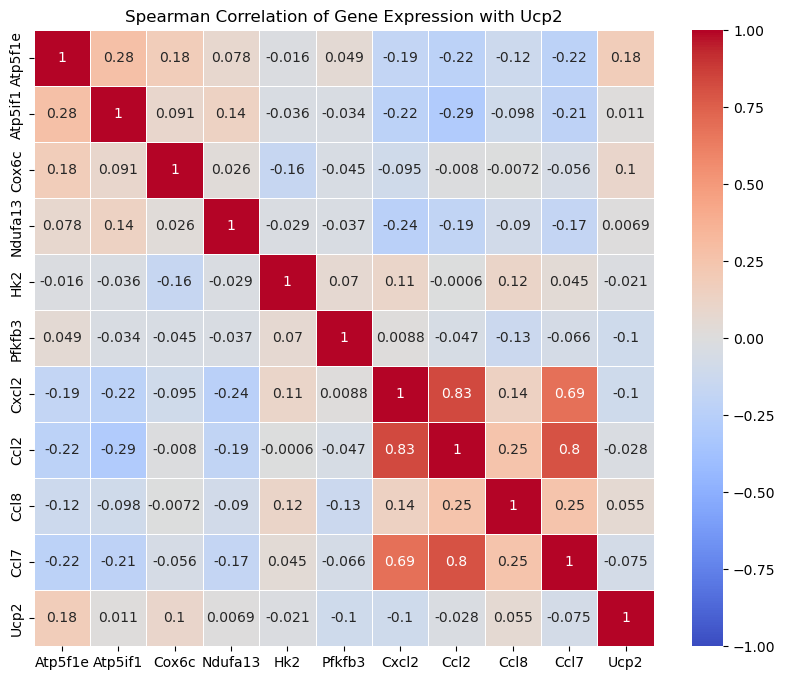

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr

# Assuming 'expr_of_interest' is the expression data for the genes of interest
genes_to_compare = ["Atp5f1e", "Atp5if1", "Cox6c", "Ndufa13", "Hk2", "Pfkfb3", "Cxcl2", "Ccl2", "Ccl8", "Ccl7"]

# Get Ucp2 expression
ucp2_expr = expr_of_interest.loc[target_gene]

# Create a DataFrame to hold expression values of interest for correlation
gene_expr_df = expr_of_interest.loc[genes_to_compare + [target_gene]]

# Calculate Spearman correlation matrix
corr_matrix, _ = spearmanr(gene_expr_df, axis=1)

# Create a DataFrame from the correlation matrix for easier visualization
corr_df = pd.DataFrame(corr_matrix, index=gene_expr_df.index, columns=gene_expr_df.index)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Spearman Correlation of Gene Expression with Ucp2")
plt.show()


In [33]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import os

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")

# Load processed and integrated data
adata = sc.read_h5ad("integratedssssss.h5ad")


In [34]:
# Check data types and convert if necessary
print(adata.obs.dtypes)  # Check the types of columns in 'obs'
adata.obs['Sample'] = adata.obs['Sample'].astype('category')
adata.obs['cell type'] = adata.obs['cell type'].astype('category')

batch                     category
doublet                       bool
n_genes                      int32
n_genes_by_counts            int32
total_counts               float32
total_counts_mt            float32
pct_counts_mt              float32
Sample                    category
_scvi_batch                   int8
_scvi_labels                  int8
leiden                    category
_scvi_raw_norm_scaling     float32
cell type                 category
condition                 category
dtype: object


In [35]:
# Subset to M2-like macrophages from ASham condition (with and without exosome)
adata = adata[adata.obs["cell type"] == "M2-like macrophages", :]
adata = adata[adata.obs["Sample"].isin(["ASham_GFP", "ASham_noGFP"])].copy()

# Optional: check counts
print(adata.obs["Sample"].value_counts())

Sample
ASham_GFP      167
ASham_noGFP    135
Name: count, dtype: int64


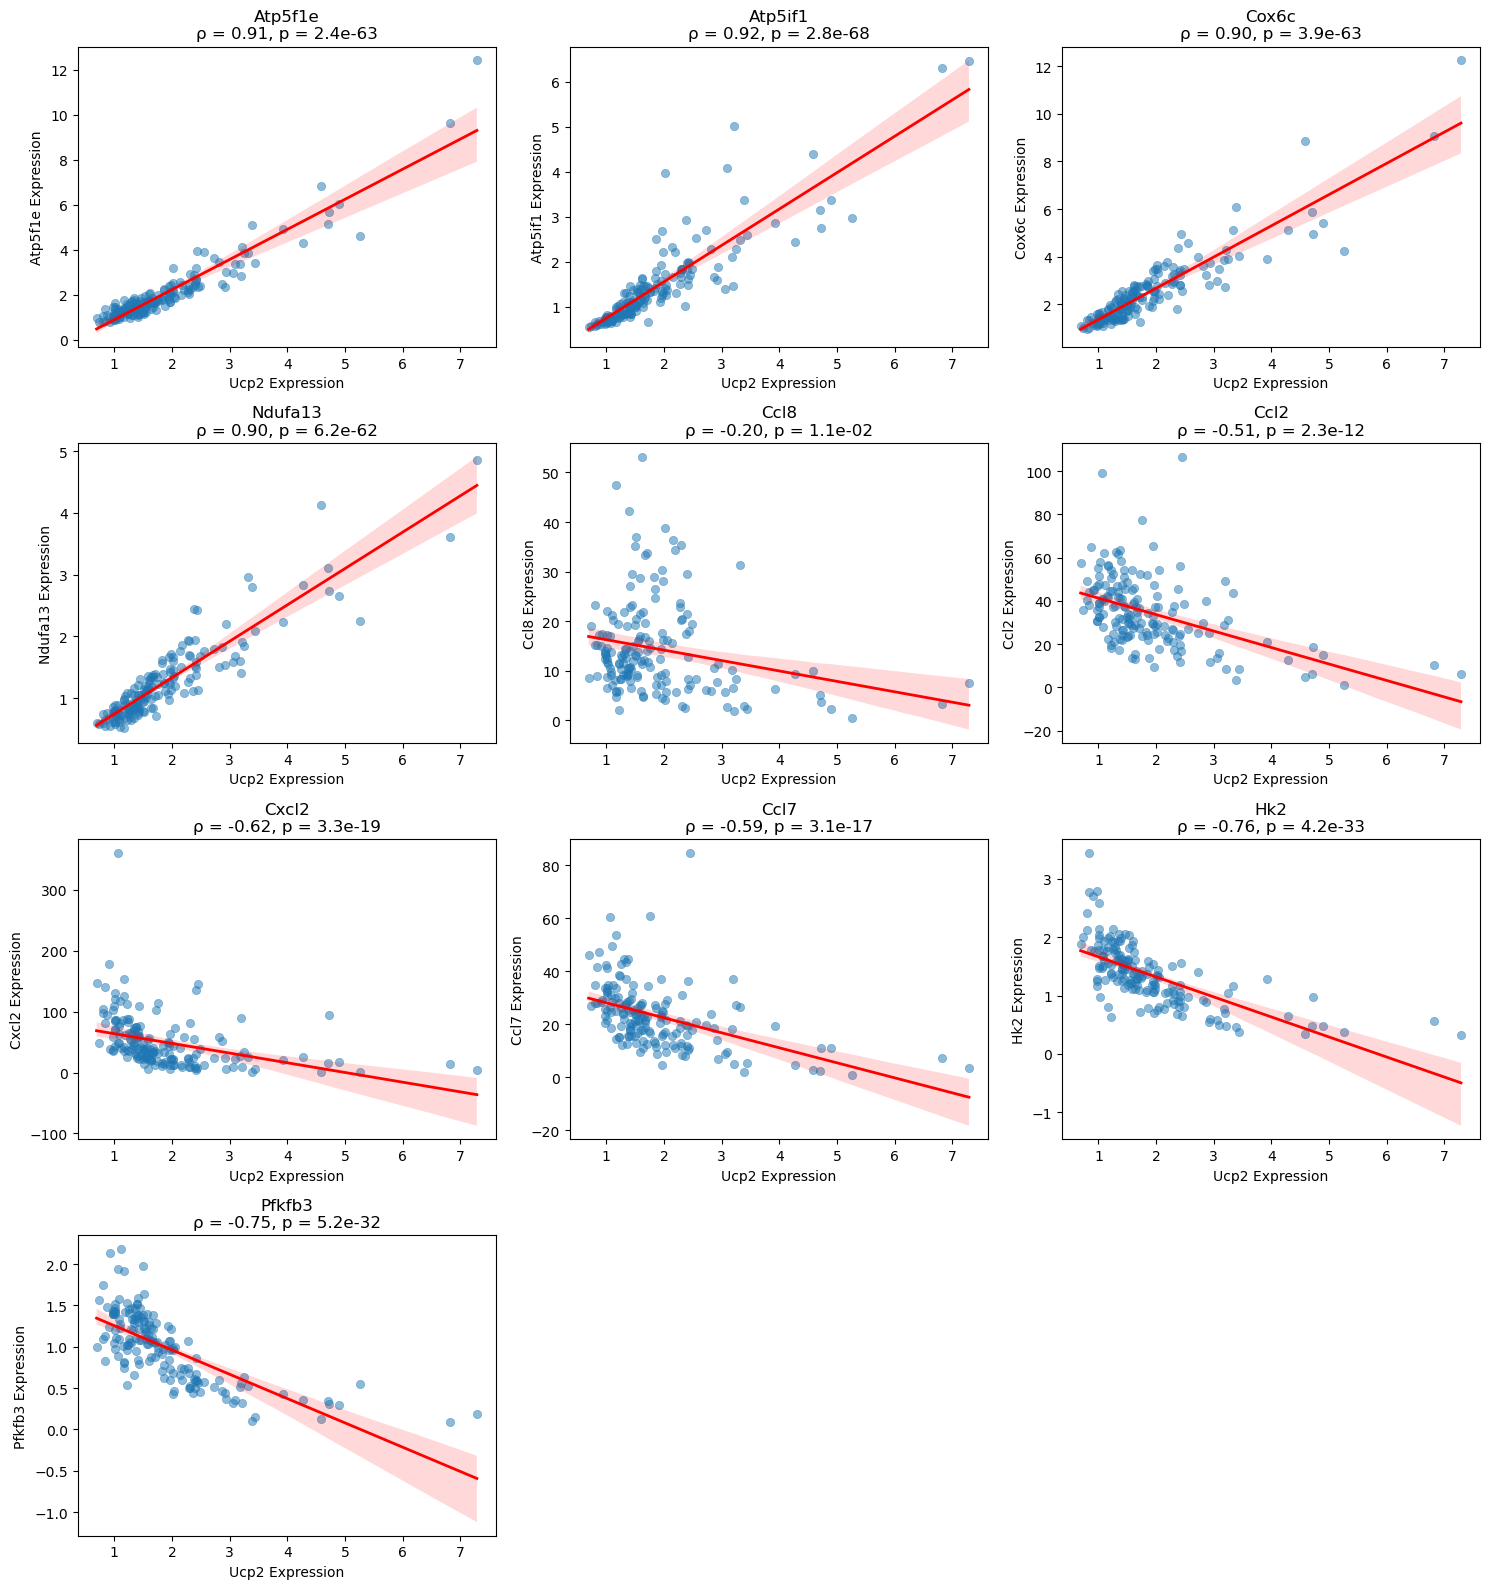

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Define genes
oxphos_genes = ["Atp5f1e", "Atp5if1", "Cox6c", "Ndufa13"]
glycolysis_genes = ["Ccl8", "Ccl2"]
growth_genes = ["Cxcl2","Ccl7", "Hk2", "Pfkfb3"]
genes_to_compare = oxphos_genes + glycolysis_genes + growth_genes

# Subset for ASham_GFP only
adata_gfp = adata[adata.obs["Sample"] == "ASham_GFP", :].copy()

# Helper function
def get_expr(adata, gene):
    if "scvi_normalized" in adata.layers:
        mat = adata[:, gene].layers["scvi_normalized"]
    elif adata.raw is not None and gene in adata.raw.var_names:
        mat = adata.raw[:, gene].X
    else:
        mat = adata[:, gene].X
    return np.array(mat).flatten()

# Get Ucp2 expression
ucp2_expr = get_expr(adata_gfp, "Ucp2")

# Set up plots
n_genes = len(genes_to_compare)
ncols = 3
nrows = (n_genes + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for i, gene in enumerate(genes_to_compare):
    gene_expr = get_expr(adata_gfp, gene)
    rho, pval = spearmanr(ucp2_expr, gene_expr)

    sns.scatterplot(x=ucp2_expr, y=gene_expr, ax=axes[i], alpha=0.5, edgecolor=None)
    sns.regplot(x=ucp2_expr, y=gene_expr, ax=axes[i], scatter=False, color='red', line_kws={'lw': 2})

    axes[i].set_title(f"{gene}\nρ = {rho:.2f}, p = {pval:.1e}")
    axes[i].set_xlabel("Ucp2 Expression")
    axes[i].set_ylabel(f"{gene} Expression")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# Save the plot as a PNG file
plt.savefig("correlation_plot.png", dpi=300)
plt.show()


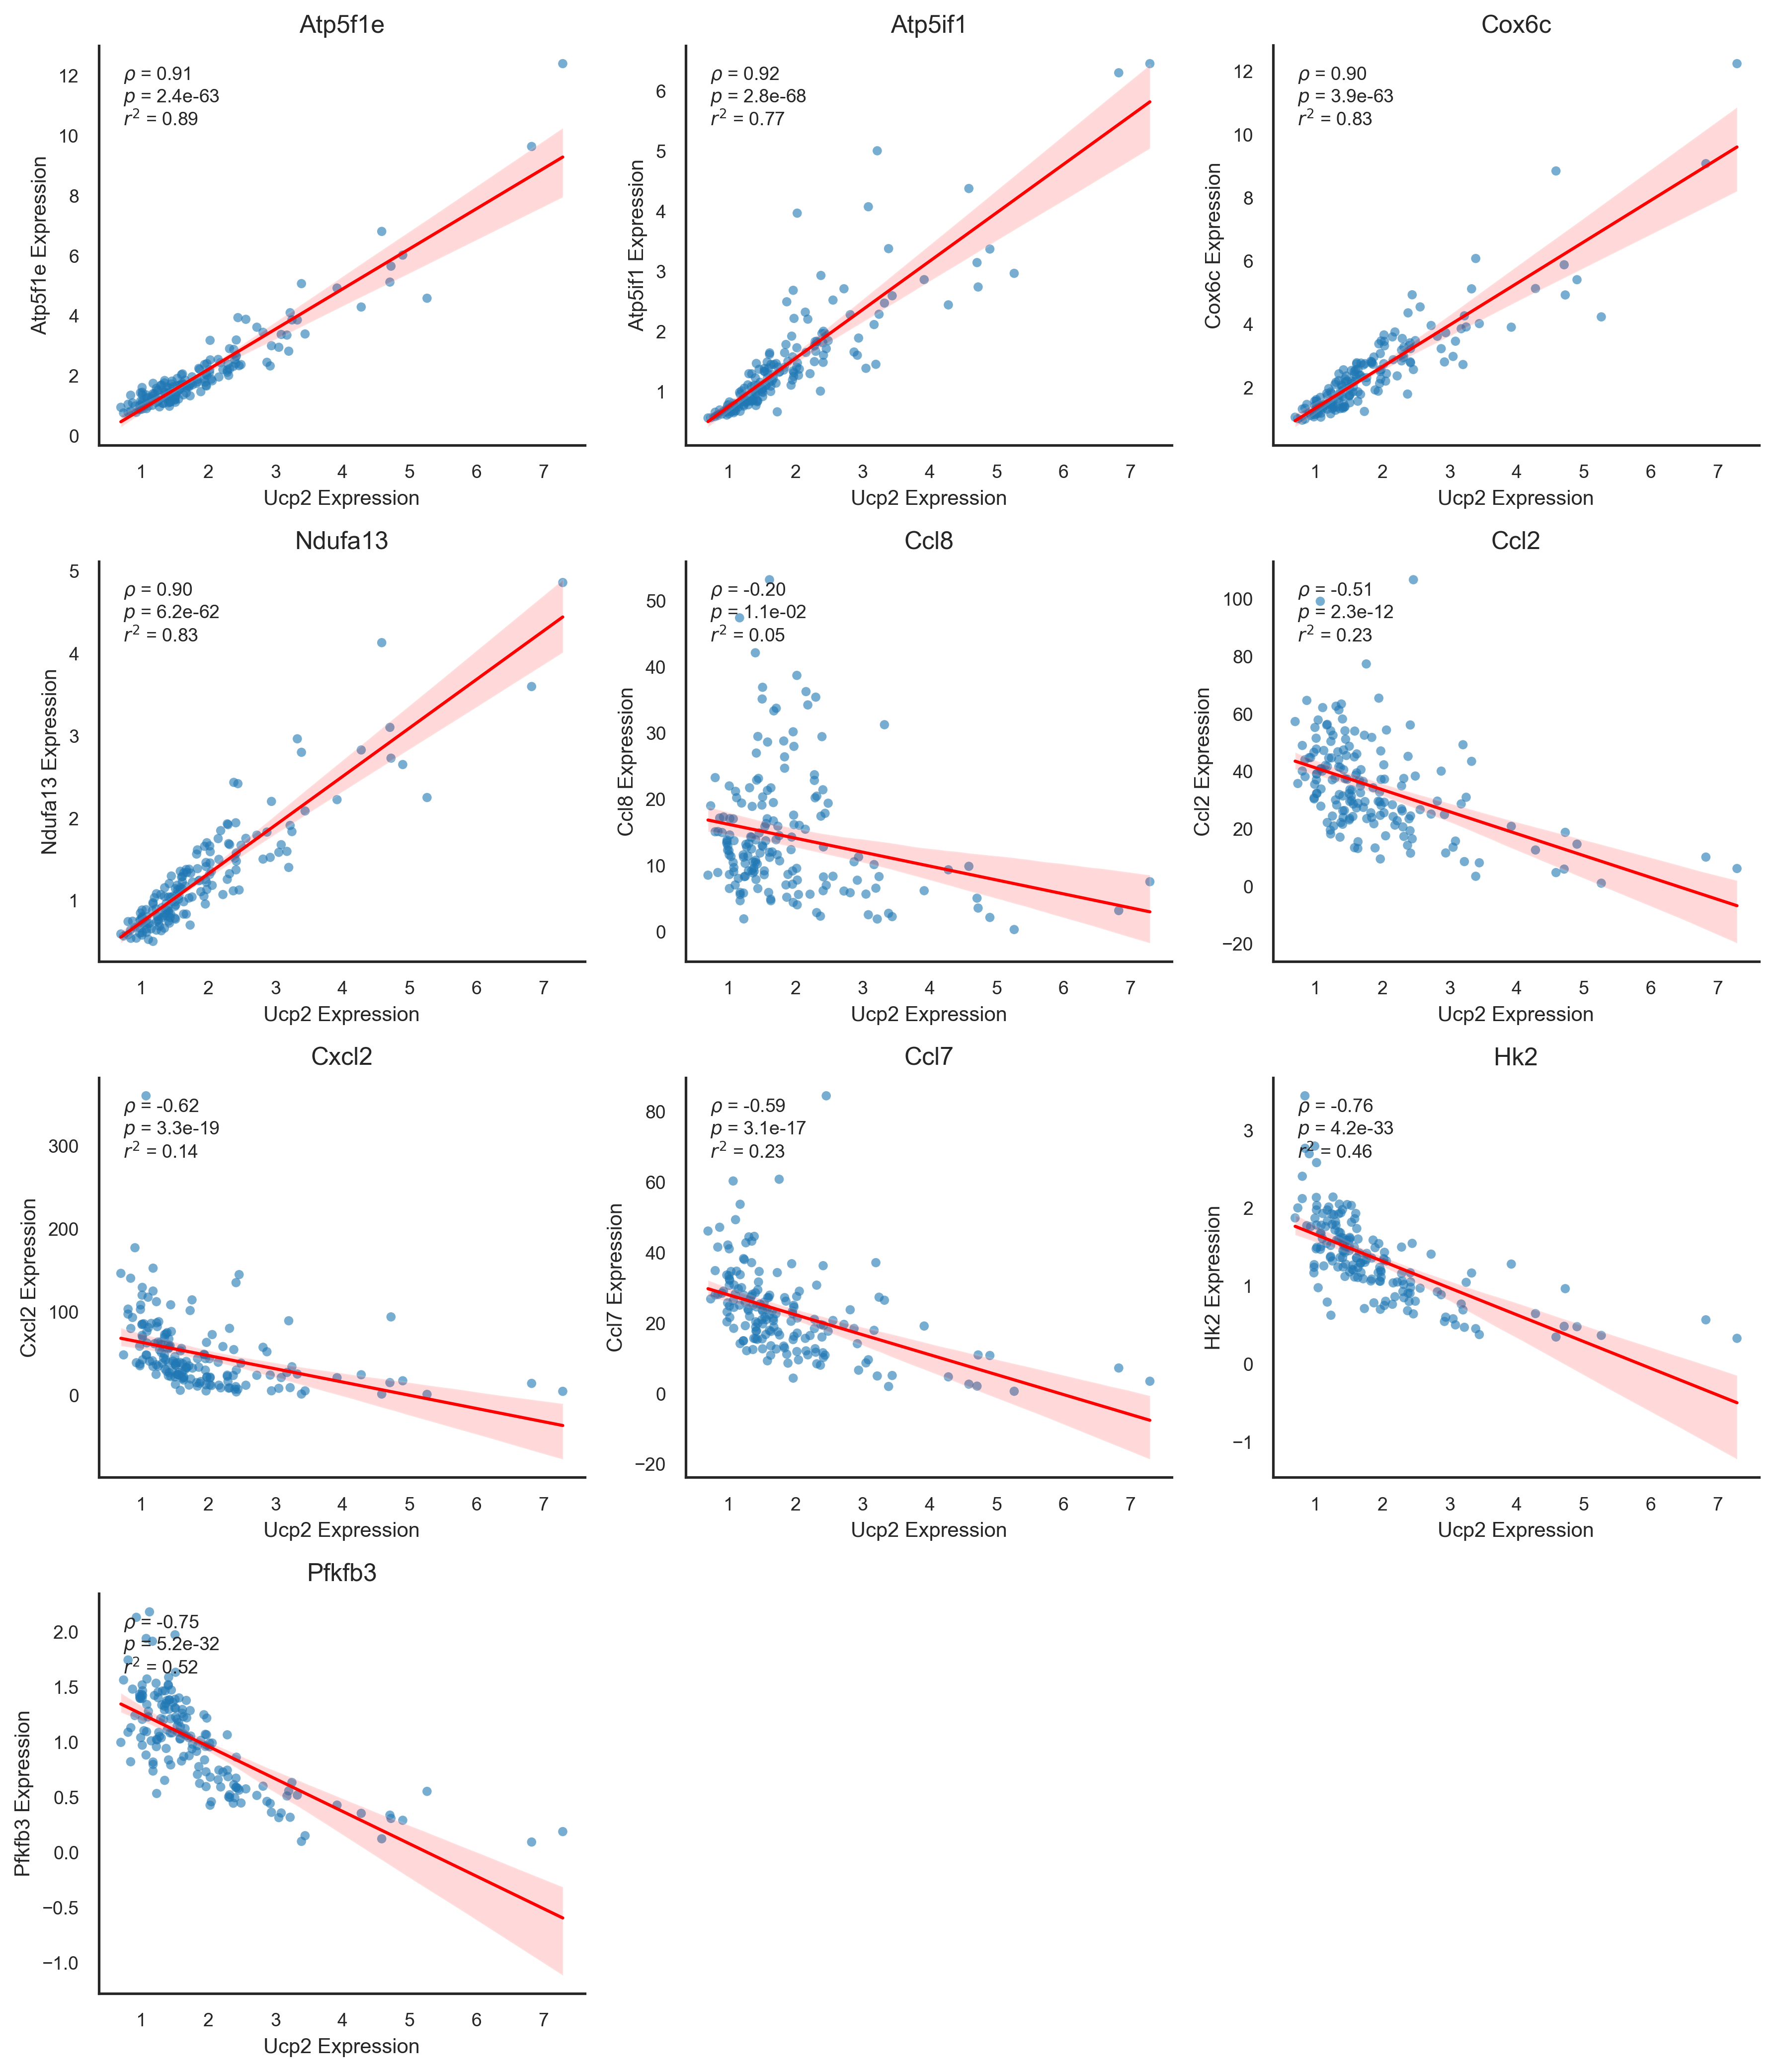

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib as mpl

# Clean aesthetic
sns.set(style="white")  # no grid
mpl.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "figure.dpi": 300,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# Define genes
oxphos_genes = ["Atp5f1e", "Atp5if1", "Cox6c", "Ndufa13"]
glycolysis_genes = ["Ccl8", "Ccl2"]
growth_genes = ["Cxcl2", "Ccl7", "Hk2", "Pfkfb3"]
genes_to_compare = oxphos_genes + glycolysis_genes + growth_genes

# Subset for ASham_GFP only
adata_gfp = adata[adata.obs["Sample"] == "ASham_GFP", :].copy()

# Helper to get expression values
def get_expr(adata, gene):
    if "scvi_normalized" in adata.layers:
        mat = adata[:, gene].layers["scvi_normalized"]
    elif adata.raw is not None and gene in adata.raw.var_names:
        mat = adata.raw[:, gene].X
    else:
        mat = adata[:, gene].X
    return np.array(mat).flatten()

# Ucp2 expression
ucp2_expr = get_expr(adata_gfp, "Ucp2")

# Set up plots
n_genes = len(genes_to_compare)
ncols = 3
nrows = (n_genes + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3.5 * nrows))
axes = axes.flatten()

for i, gene in enumerate(genes_to_compare):
    gene_expr = get_expr(adata_gfp, gene)
    rho, pval = spearmanr(ucp2_expr, gene_expr)

    # Linear regression for r²
    x = ucp2_expr.reshape(-1, 1)
    y = gene_expr
    model = LinearRegression().fit(x, y)
    r_squared = model.score(x, y)

    # Plot
    sns.scatterplot(x=ucp2_expr, y=gene_expr, ax=axes[i], alpha=0.6, s=20, edgecolor='none', color="#1f77b4")
    sns.regplot(x=ucp2_expr, y=gene_expr, ax=axes[i], scatter=False, color='red', line_kws={'lw': 1.5})

    # Labels and annotation
    axes[i].set_title(f"{gene}")
    axes[i].set_xlabel("Ucp2 Expression")
    axes[i].set_ylabel(f"{gene} Expression")
    axes[i].text(0.05, 0.95, f"$\\rho$ = {rho:.2f}\n$p$ = {pval:.1e}\n$r^2$ = {r_squared:.2f}",
                 transform=axes[i].transAxes,
                 verticalalignment='top', fontsize=9)

# Remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("correlation_plot_clean.png", dpi=600)
plt.show()


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib as mpl

# Clean aesthetic
sns.set(style="white")  # no grid
mpl.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "figure.dpi": 300,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# Define genes
oxphos_genes = ["Atp5f1e", "Atp5if1", "Cox6c", "Ndufa13"]
glycolysis_genes = ["Ccl8", "Ccl2"]
growth_genes = ["Cxcl2", "Ccl7", "Hk2", "Pfkfb3"]
genes_to_compare = oxphos_genes + glycolysis_genes + growth_genes

# Subset for ASham_GFP only
adata_gfp = adata[adata.obs["Sample"] == "ASham_GFP", :].copy()

# Helper to get expression values
def get_expr(adata, gene):
    if "scvi_normalized" in adata.layers:
        mat = adata[:, gene].layers["scvi_normalized"]
    elif adata.raw is not None and gene in adata.raw.var_names:
        mat = adata.raw[:, gene].X
    else:
        mat = adata[:, gene].X
    return np.array(mat).flatten()

# Ucp2 expression
ucp2_expr = get_expr(adata_gfp, "Ucp2")

# Loop through each gene and create a plot
for gene in genes_to_compare:
    gene_expr = get_expr(adata_gfp, gene)
    rho, pval = spearmanr(ucp2_expr, gene_expr)

    # Linear regression for r²
    x = ucp2_expr.reshape(-1, 1)
    y = gene_expr
    model = LinearRegression().fit(x, y)
    r_squared = model.score(x, y)

    # Create plot for the gene
    fig, ax = plt.subplots(figsize=(3, 3))

    # Plot scatter and regression line
    sns.scatterplot(x=ucp2_expr, y=gene_expr, ax=ax, alpha=0.6, s=20, edgecolor='none', color="#1f77b4")
    sns.regplot(x=ucp2_expr, y=gene_expr, ax=ax, scatter=False, color='red', line_kws={'lw': 1.5})

    # Set labels and title
    ax.set_title(f"{gene}")
    ax.set_xlabel("Ucp2 Expression")
    ax.set_ylabel(f"{gene} Expression")
    ax.text(0.05, 0.95, f"$\\rho$ = {rho:.2f}\n$p$ = {pval:.1e}\n$r^2$ = {r_squared:.2f}",
            transform=ax.transAxes, verticalalignment='top', fontsize=9)

    # Save the plot with the gene name as the file name
    plt.tight_layout()
    plt.savefig(f"correlation_plot_{gene}.png", dpi=600)
    plt.close()  # Close the figure after saving to avoid memory overload


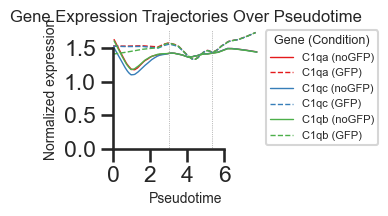

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
genes = ["C1qa", "C1qc", "C1qb"]

# Get expression values
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build dataframe for plotting
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond
            })
df = pd.DataFrame(records)

# Color settings
palette = sns.color_palette("Set1", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

# Plotting
plt.figure(figsize=(5, 2.5))  # Reduced figure size
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        linestyle = "-" if cond == "ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:, 0], sm[:, 1], color=color, linestyle=linestyle, linewidth=1, label=label)  # Thinner lines

# Bin boundaries
ax.axvline(early_max, color="gray", linestyle=":", linewidth=0.5)
ax.axvline(mid_max, color="gray", linestyle=":", linewidth=0.5)

# Axis styling
ax.set_xlabel("Pseudotime", fontsize=10)
ax.set_ylabel("Normalized expression", fontsize=10)
ax.set_title("Gene Expression Trajectories Over Pseudotime", fontsize=12)

# Move spines to origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Adjust limits
x_min, x_max = pseudotime.min(), pseudotime.max()
ax.set_xlim(left=max(0, x_min - 0.1), right=x_max + 0.1)
y_min = df["expression"].min()
ax.set_ylim(bottom=max(0, y_min - 0.1))

# Legend (moved to right outside plot)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(
    by_label.values(),
    by_label.keys(),
    fontsize=8,
    title="Gene (Condition)",
    title_fontsize=9,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

sns.despine(trim=True)
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for legend
plt.savefig("Pseudotime_gene_exp_smallresAPC.png", dpi=300)
plt.show()


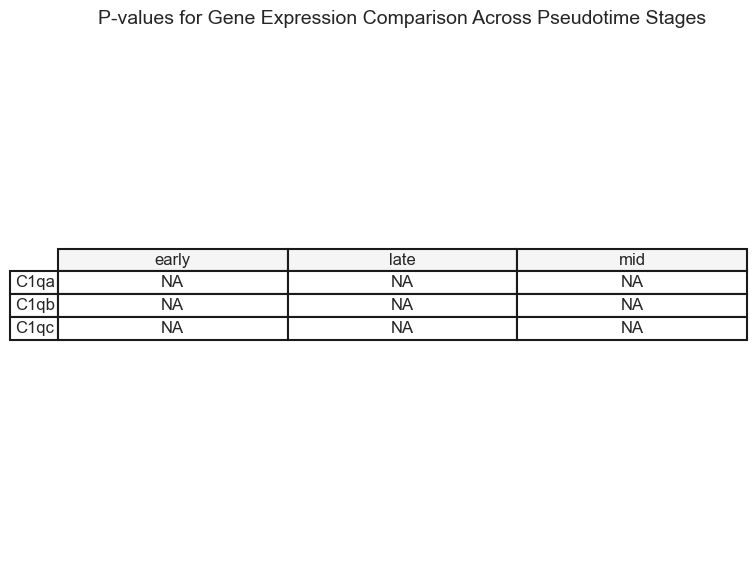

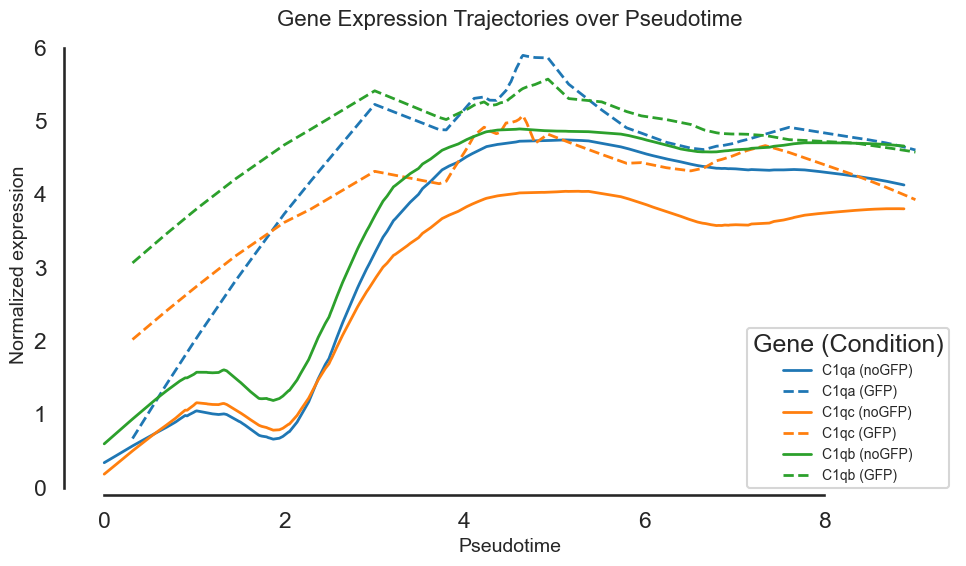

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import ttest_ind

# Load data (adjust paths as needed)
umap_df = pd.read_csv("pseudotime_metadata_for_pythonDEN.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_pythonDEN.csv", index_col=0)
cell_metadata = pd.read_csv("cell_metadata_for_pythonDEN.csv", index_col=0)

# Genes of interest
genes = ["C1qa", "C1qc", "C1qb"]

# Helper to get gene expression as Series aligned with umap_df
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene]
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

# Pseudotime bins
pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build merged DataFrame with expression and metadata
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for idx in umap_df[mask].index:
            records.append({
                "gene": gene,
                "expression": expr.loc[idx],
                "pseudotime": pseudotime.loc[idx],
                "condition": cond
            })
df = pd.DataFrame(records)

# Create a DataFrame to store p-values for each gene at each pseudotime stage
p_values = []

# Define pseudotime bins
bins = {
    'early': (0, early_max),
    'mid': (early_max, mid_max),
    'late': (mid_max, np.max(pseudotime))
}

for gene in genes:
    df_gene = df[df["gene"] == gene]
    
    for stage, (low, high) in bins.items():
        # Subset to stage
        stage_mask = (df_gene["pseudotime"] >= low) & (df_gene["pseudotime"] < high)
        group = df_gene[stage_mask]
        
        # Split by condition
        expr_noGFP = group[group["condition"] == "ASham_noGFP"]["expression"]
        expr_GFP = group[group["condition"] == "ASham_GFP"]["expression"]

        # T-test
        if len(expr_noGFP) > 1 and len(expr_GFP) > 1:
            _, p_val = ttest_ind(expr_noGFP, expr_GFP, equal_var=False)
        else:
            p_val = np.nan  # Not enough data

        p_values.append({
            "gene": gene,
            "stage": stage,
            "p-value": f"{p_val:.2e}" if not np.isnan(p_val) else "NA"
        })

# Create DataFrame and save pivot table
p_value_df = pd.DataFrame(p_values)
p_value_pivot = p_value_df.pivot(index="gene", columns="stage", values="p-value")
p_value_pivot.to_csv("pseudotime_pvalues_DEN.csv")

# Display the p-value table
plt.figure(figsize=(8, 6))
plt.axis('off')
table = plt.table(cellText=p_value_pivot.values,
                  colLabels=p_value_pivot.columns,
                  rowLabels=p_value_pivot.index,
                  cellLoc='center', loc='center', colColours=['#f5f5f5']*p_value_pivot.shape[1])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title("P-values for Gene Expression Comparison Across Pseudotime Stages", fontsize=14)
plt.tight_layout()
plt.show()

# Plot LOWESS-smoothed expression trajectories
palette = sns.color_palette("tab10", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

plt.figure(figsize=(10, 6))
ax = plt.gca()

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        if len(sub) > 0:
            sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
            ls = "-" if cond == "ASham_noGFP" else "--"
            label = f"{gene} ({'noGFP' if cond == 'ASham_noGFP' else 'GFP'})"
            ax.plot(sm[:, 0], sm[:, 1], color=color, linestyle=ls, linewidth=2, label=label)

# Add vertical lines for bin boundaries
ax.axvline(early_max, color="black", linestyle=":", linewidth=1)
ax.axvline(mid_max, color="black", linestyle=":", linewidth=1)

# Final styling
ax.set_title("Gene Expression Trajectories over Pseudotime", fontsize=16)
ax.set_xlabel("Pseudotime", fontsize=14)
ax.set_ylabel("Normalized expression", fontsize=14)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=10, title="Gene (Condition)")
sns.despine(trim=True)
plt.tight_layout()
plt.show()


Record counts:
 gene  condition  
C1qa  ASham_GFP       77
      ASham_noGFP    256
C1qb  ASham_GFP       77
      ASham_noGFP    256
C1qc  ASham_GFP       77
      ASham_noGFP    256
dtype: int64


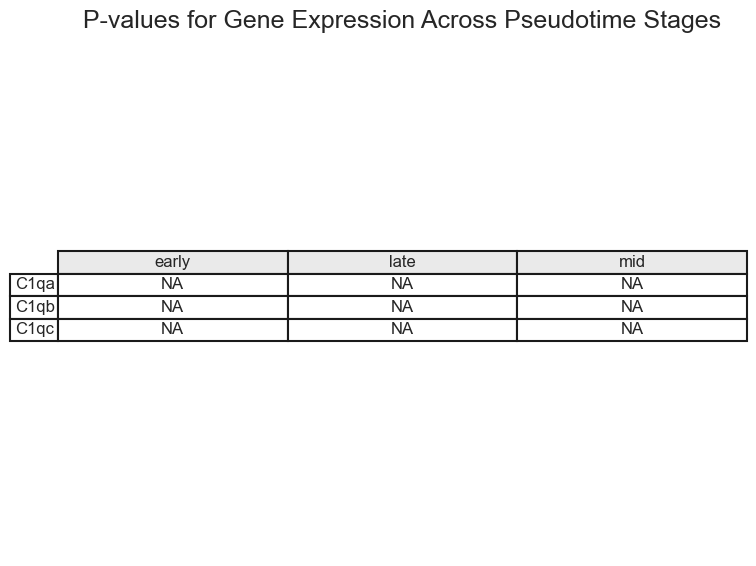

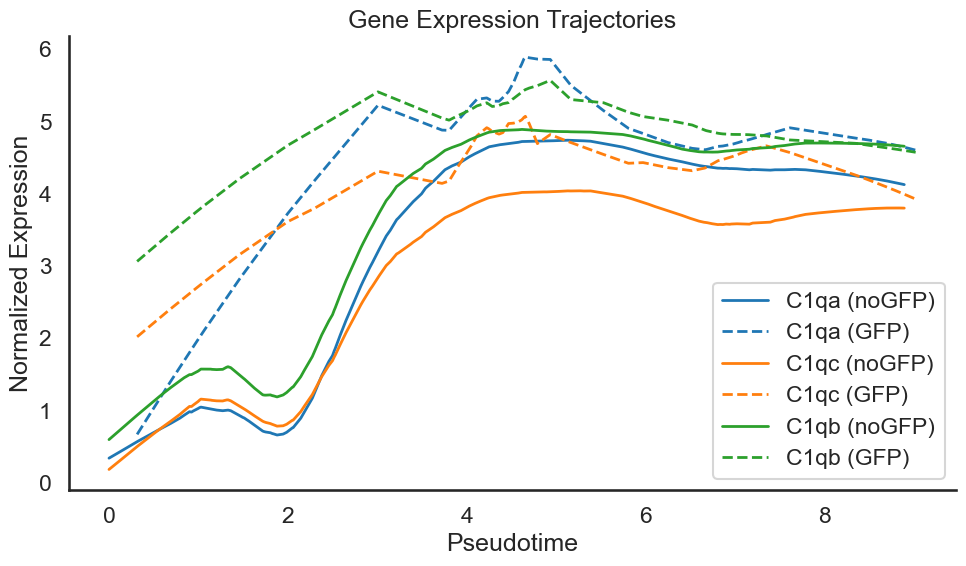

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import ttest_ind

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_pythonDEN.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_pythonDEN.csv", index_col=0)
cell_metadata = pd.read_csv("cell_metadata_for_pythonDEN.csv", index_col=0)

# Ensure alignment
common_cells = expr_matrix.columns.intersection(umap_df.index)
expr_matrix = expr_matrix[common_cells]
umap_df = umap_df.loc[common_cells]

# Genes of interest
genes = ["C1qa", "C1qc", "C1qb"]

# Pseudotime and bin edges
pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Build dataframe
records = []
for gene in genes:
    if gene not in expr_matrix.index:
        print(f"Gene {gene} not found!")
        continue

    expr = expr_matrix.loc[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        cond_cells = umap_df[umap_df["Sample"] == cond].index
        for cell in cond_cells:
            records.append({
                "gene": gene,
                "expression": expr[cell],
                "pseudotime": pseudotime[cell],
                "condition": cond
            })

df = pd.DataFrame(records)

# Check that df is not empty
print("Record counts:\n", df.groupby(['gene', 'condition']).size())

# Statistical testing
p_values = []
for gene in genes:
    for stage, (low, high) in zip(['early', 'mid', 'late'], [(0, early_max), (early_max, mid_max), (mid_max, np.max(pseudotime))]):
        stage_mask = (df["gene"] == gene) & (df["pseudotime"] >= low) & (df["pseudotime"] < high)

        expr_1 = df[stage_mask & (df["condition"] == "ASham_noGFP")]["expression"]
        expr_2 = df[stage_mask & (df["condition"] == "ASham_GFP")]["expression"]

        if len(expr_1) > 1 and len(expr_2) > 1:
            stat, p_val = ttest_ind(expr_1, expr_2)
            p_val_str = f"{p_val:.2e}"
        else:
            p_val_str = "NA"

        p_values.append({
            "gene": gene,
            "stage": stage,
            "p-value": p_val_str
        })

# Pivot for display
pval_df = pd.DataFrame(p_values).pivot(index="gene", columns="stage", values="p-value")

# Save to CSV
pval_df.to_csv("gene_stage_pvals.csv")

# Display table
plt.figure(figsize=(8, 6))
plt.axis('off')
table = plt.table(cellText=pval_df.values,
                  rowLabels=pval_df.index,
                  colLabels=pval_df.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=['#eaeaea'] * pval_df.shape[1])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title("P-values for Gene Expression Across Pseudotime Stages")
plt.tight_layout()
plt.show()

# Plot expression trajectories
plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", len(genes))
gene_colors = {gene: color for gene, color in zip(genes, palette)}

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        linestyle = "-" if cond == "ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond == 'ASham_noGFP' else 'GFP'})"
        plt.plot(sm[:, 0], sm[:, 1], label=label, color=color, linestyle=linestyle, linewidth=2)

# Add vertical lines for pseudotime bins
plt.axvline(early_max, linestyle=":", color="black")
plt.axvline(mid_max, linestyle=":", color="black")
plt.xlabel("Pseudotime")
plt.ylabel("Normalized Expression")
plt.title("Gene Expression Trajectories")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


In [17]:
p_values = []
for gene in genes:
    for stage, (low, high, include_high) in zip(
        ['early', 'mid', 'late'],
        [(0, early_max, False), (early_max, mid_max, False), (mid_max, np.max(pseudotime), True)]
    ):
        if include_high:
            stage_mask = (df["gene"] == gene) & (df["pseudotime"] >= low) & (df["pseudotime"] <= high)
        else:
            stage_mask = (df["gene"] == gene) & (df["pseudotime"] >= low) & (df["pseudotime"] < high)

        expr_1 = df[stage_mask & (df["condition"] == "ASham_noGFP")]["expression"]
        expr_2 = df[stage_mask & (df["condition"] == "ASham_GFP")]["expression"]

        print(f"{gene} - {stage} → noGFP: {len(expr_1)}, GFP: {len(expr_2)}")

        if len(expr_1) > 1 and len(expr_2) > 1:
            stat, p_val = ttest_ind(expr_1, expr_2)
            p_val_str = f"{p_val:.2e}"
        else:
            p_val_str = "NA"

        p_values.append({
            "gene": gene,
            "stage": stage,
            "p-value": p_val_str
        })


C1qa - early → noGFP: 0, GFP: 0
C1qa - mid → noGFP: 0, GFP: 0
C1qa - late → noGFP: 0, GFP: 0
C1qc - early → noGFP: 0, GFP: 0
C1qc - mid → noGFP: 0, GFP: 0
C1qc - late → noGFP: 0, GFP: 0
C1qb - early → noGFP: 0, GFP: 0
C1qb - mid → noGFP: 0, GFP: 0
C1qb - late → noGFP: 0, GFP: 0
